# Principal component analysis (PCA) -Hierarchical & K-Means Clustering

## Importing Libraries

In [223]:
import pandas as pd                                   #read dataset
import numpy as np                                    #help in array building    
import seaborn as sns                                 #visualizing data
import matplotlib.pylab as plt                        #visualizing data
from sklearn.preprocessing import StandardScaler, normalize      #standardization of data to balance the unit between different variables  
sns.set()
import scipy.cluster.hierarchy as sch                 #for creating dendrogram 
from sklearn.cluster import AgglomerativeClustering   #for Agglomerative is a hierarchical clustering method that applies the "bottom-up" approach to group the elements in a dataset. 
from sklearn.decomposition import PCA                 #We’ll employ PCA to reduce the number of features in our data set Dimensionality Reduction
from scipy.cluster.hierarchy import linkage           #Performs hierarchical/agglomerative clustering on the condensed distance matrix
from sklearn.cluster import KMeans                    #The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data.
%matplotlib inline
from scipy import stats
from sklearn.metrics import silhouette_score
import matplotlib

## Importing Dataset-1

In [224]:
univ_data=pd.read_csv('Universities_Clustering.csv')
univ_data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


## Importing Dataset-2

In [225]:
wine_data= pd.read_csv('wine.csv')
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Working Problem

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

## Working on Dataset-1

In [226]:
univ_data.shape

(25, 8)

In [227]:
univ_data

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90
5,Dartmouth,NH,1340,89,23,10,32162,95
6,Duke,NC,1315,90,30,12,31585,95
7,Georgetown,DC,1255,74,24,12,20126,92
8,Harvard,MA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,1305,75,44,7,58691,87


In [228]:
univ_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [229]:
univ_data.Univ= pd.Categorical(univ_data.Univ)

In [230]:
univ_data.State= pd.Categorical(univ_data.State)

In [231]:
univ_data.Expenses= pd.to_numeric(univ_data.Expenses,downcast='integer')

In [232]:
univ_data.describe(include='all')

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25,25,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
unique,25,17,NaN,NaN,NaN,NaN,NaN,NaN
top,Brown,CA,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,NaN,NaN,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,NaN,NaN,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,NaN,NaN,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,NaN,NaN,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,NaN,NaN,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000


In [233]:
#checking missing value
univ_data.isna().sum()

Univ        0
State       0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [234]:
# Checking the percentage of missing values
round(100*(univ_data.isnull().sum()/len(univ_data.index)),2)

Univ        0.0
State       0.0
SAT         0.0
Top10       0.0
Accept      0.0
SFRatio     0.0
Expenses    0.0
GradRate    0.0
dtype: float64

<AxesSubplot:xlabel='GradRate'>

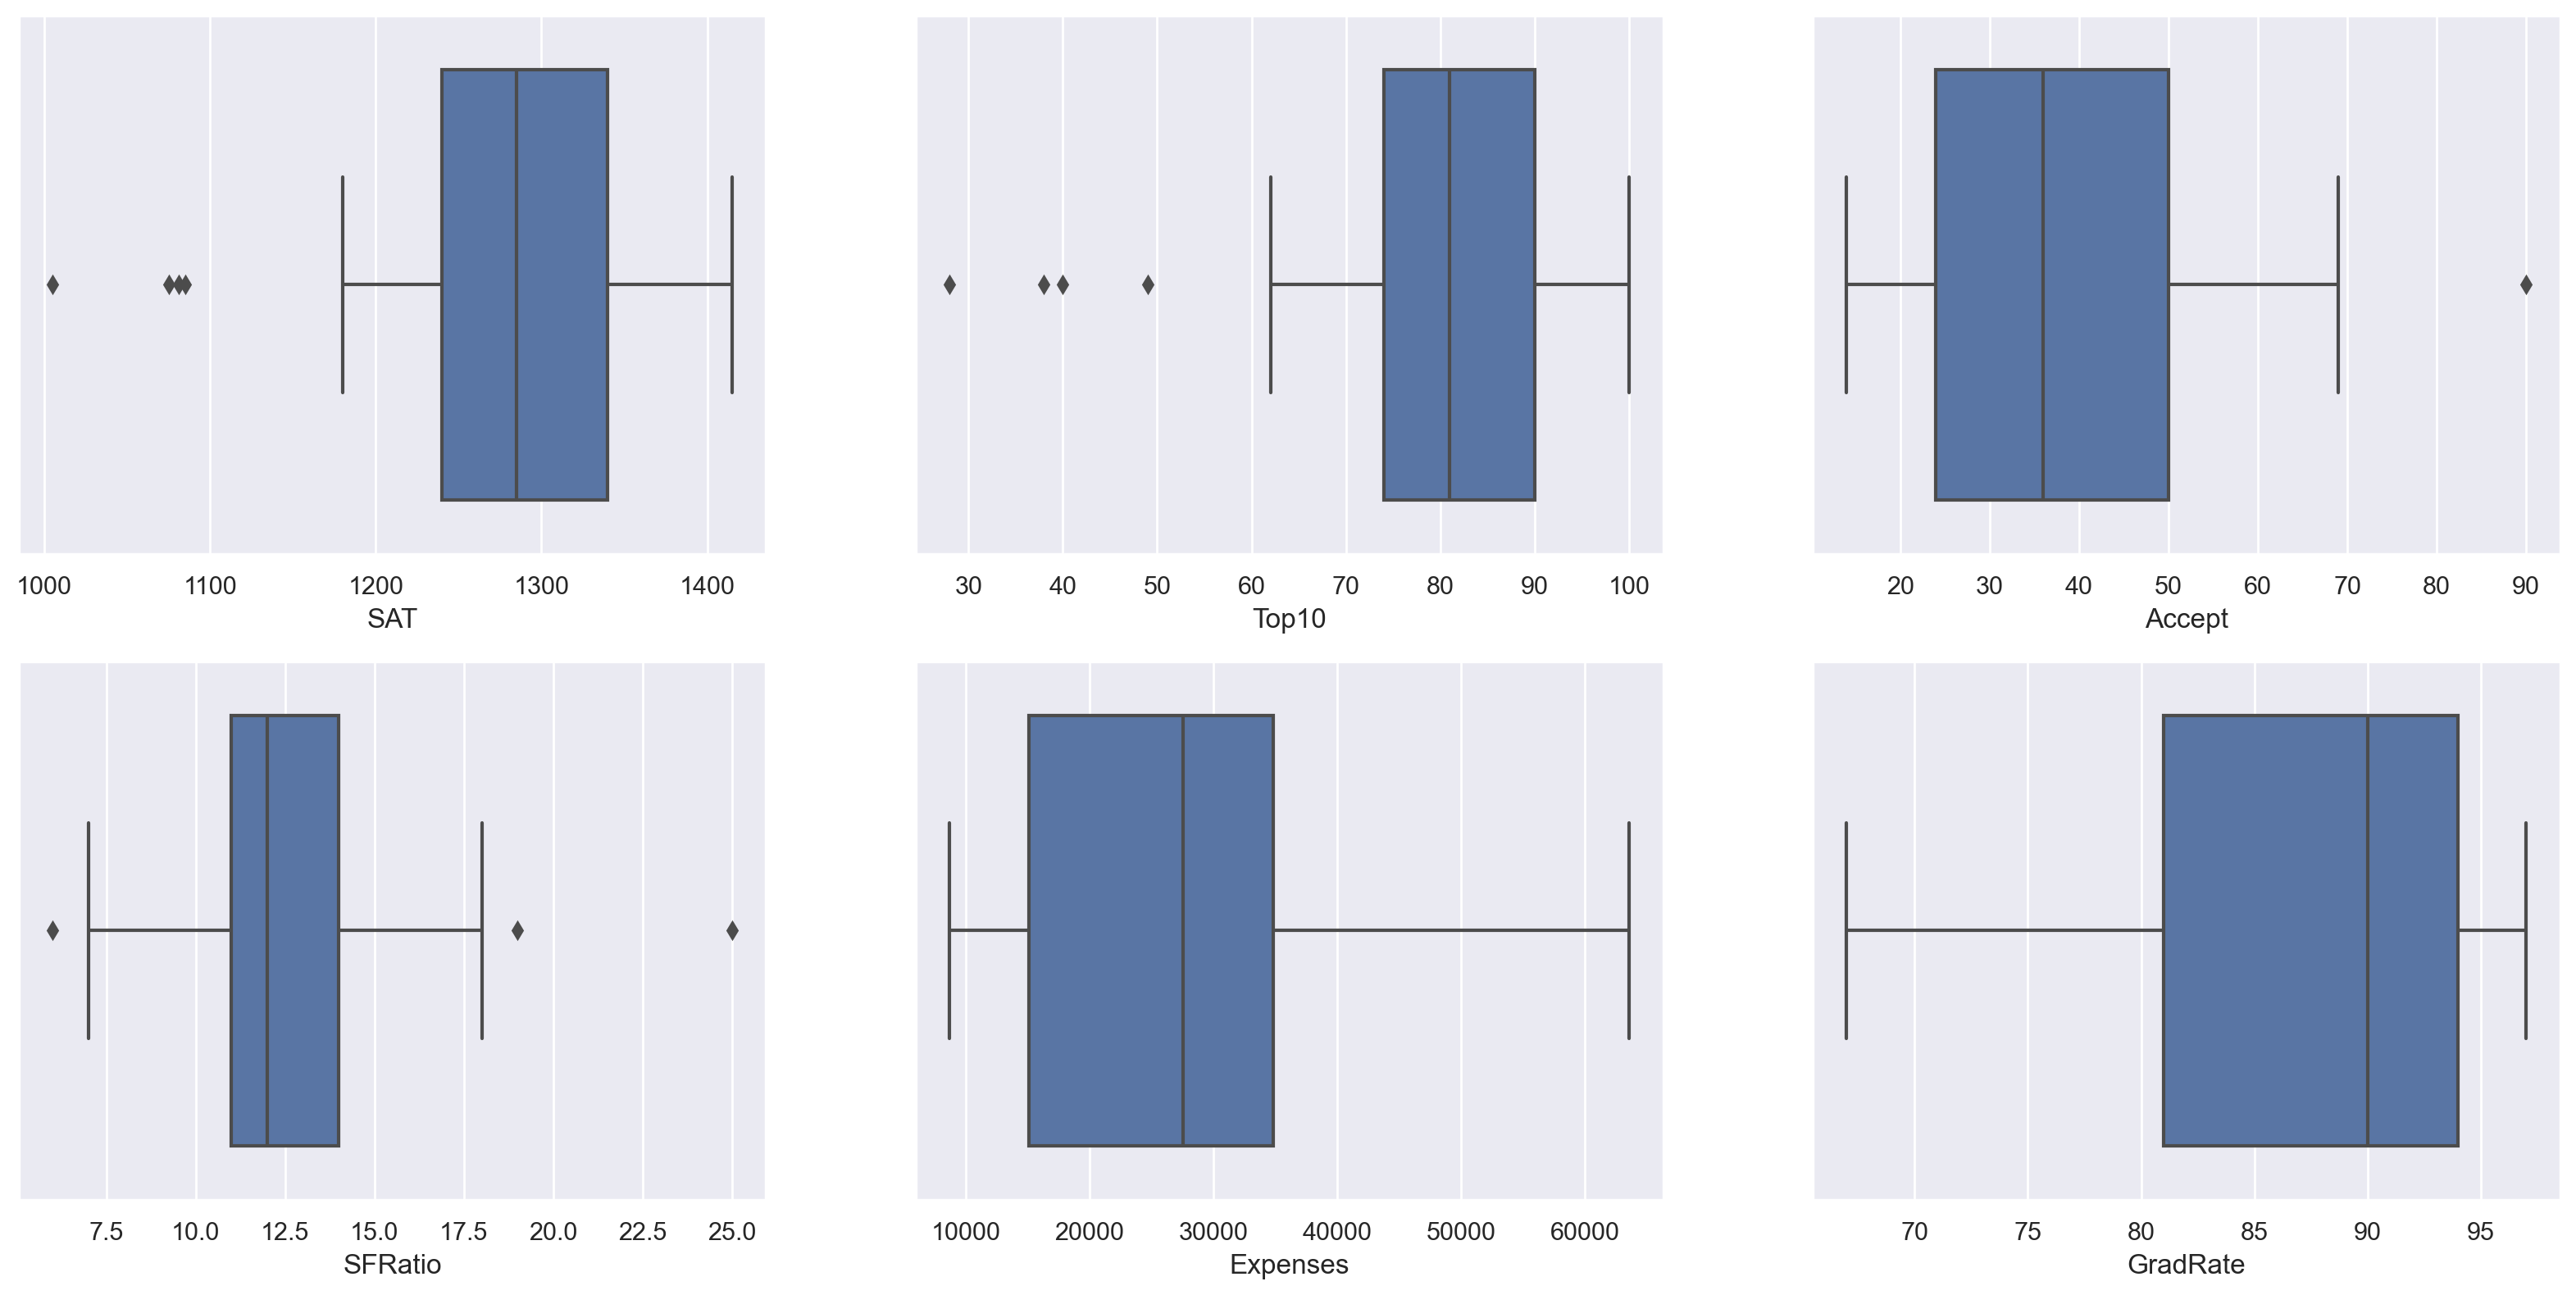

In [235]:
#Checking for outliers using boxplot
plt.figure(figsize=(20,20),dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x='SAT',data=univ_data)

plt.subplot(4,3,2)
sns.boxplot(x='Top10',data=univ_data)

plt.subplot(4,3,3)
sns.boxplot(x='Accept',data=univ_data)

plt.subplot(4,3,4)
sns.boxplot(x='SFRatio',data=univ_data)

plt.subplot(4,3,5)
sns.boxplot(x='Expenses',data=univ_data)

plt.subplot(4,3,6)
sns.boxplot(x='GradRate',data=univ_data)

In [236]:
#Finding Outliers
#position of the outliers
print(np.where(univ_data.SAT<1100))

(array([13, 15, 17, 23], dtype=int64),)


In [237]:
#seeing the row data
result= univ_data.iloc[[13, 15, 17, 23]]
result

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
13,PennState,PA,1081,38,54,18,10185,80
15,Purdue,IN,1005,28,90,19,9066,69
17,TexasA&M,TX,1075,49,67,25,8704,67
23,UWisconsin,WI,1085,40,69,15,11857,71


In [238]:
#Finding Outliers
#position of the outliers
print(np.where(univ_data.Top10<50))

(array([13, 15, 17, 23], dtype=int64),)


In [239]:
#seeing the row data
result= univ_data.iloc[[13, 15, 17, 23]]
result

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
13,PennState,PA,1081,38,54,18,10185,80
15,Purdue,IN,1005,28,90,19,9066,69
17,TexasA&M,TX,1075,49,67,25,8704,67
23,UWisconsin,WI,1085,40,69,15,11857,71


In [240]:
#Finding Outliers
#position of the outliers
print(np.where(univ_data.Accept>80))

(array([15], dtype=int64),)


In [241]:
#seeing the row data
result= univ_data.iloc[[15]]
result

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
15,Purdue,IN,1005,28,90,19,9066,69


In [242]:
#Finding Outliers
#position of the outliers
print(np.where(univ_data.SFRatio>18))

(array([15, 17], dtype=int64),)


In [243]:
#Finding Outliers
#position of the outliers
print(np.where(univ_data.SFRatio<7))

(array([1], dtype=int64),)


In [244]:
#seeing the row data
result= univ_data.iloc[[1, 15, 17]]
result

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
1,CalTech,CA,1415,100,25,6,63575,81
15,Purdue,IN,1005,28,90,19,9066,69
17,TexasA&M,TX,1075,49,67,25,8704,67


As the data consists of particular university so we cannot say on outliers to drop and data in our dataset are not to big so we will keep all the data and work as it is.

<AxesSubplot:>

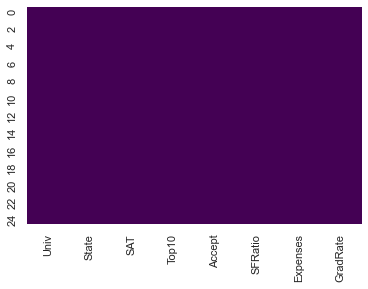

In [245]:
# Visualizing null values
sns.heatmap(univ_data.isnull(),cbar=False, cmap='viridis')

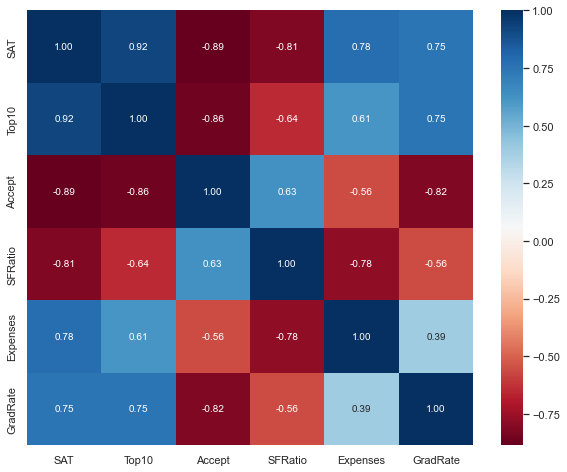

In [246]:
corr= univ_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap='RdBu',fmt='.2f')
plt.show()

As the dataset shows variables are correlated with each other but due to insufficient huge data we will work with them.

Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

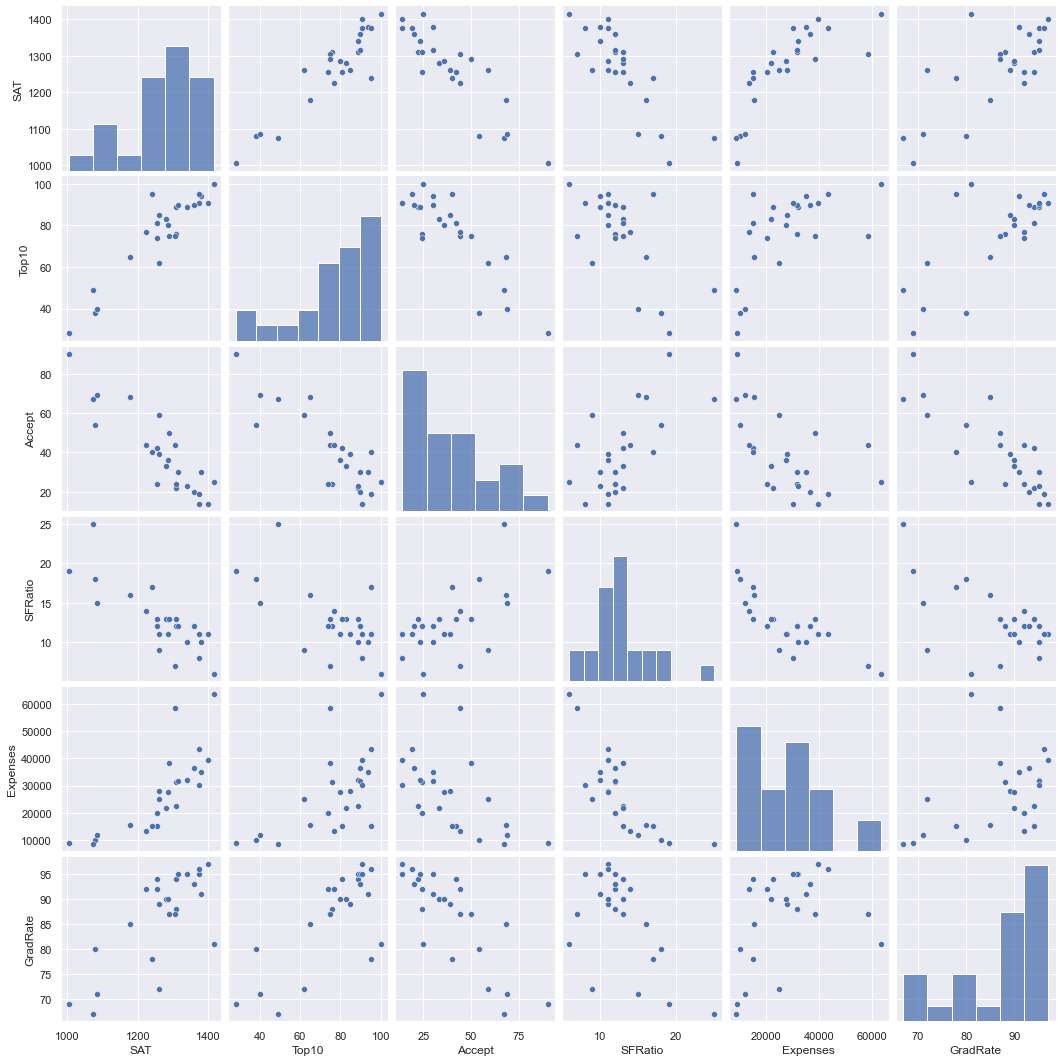

In [247]:
sns.pairplot(univ_data)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='GradRate', ylabel='Density'>

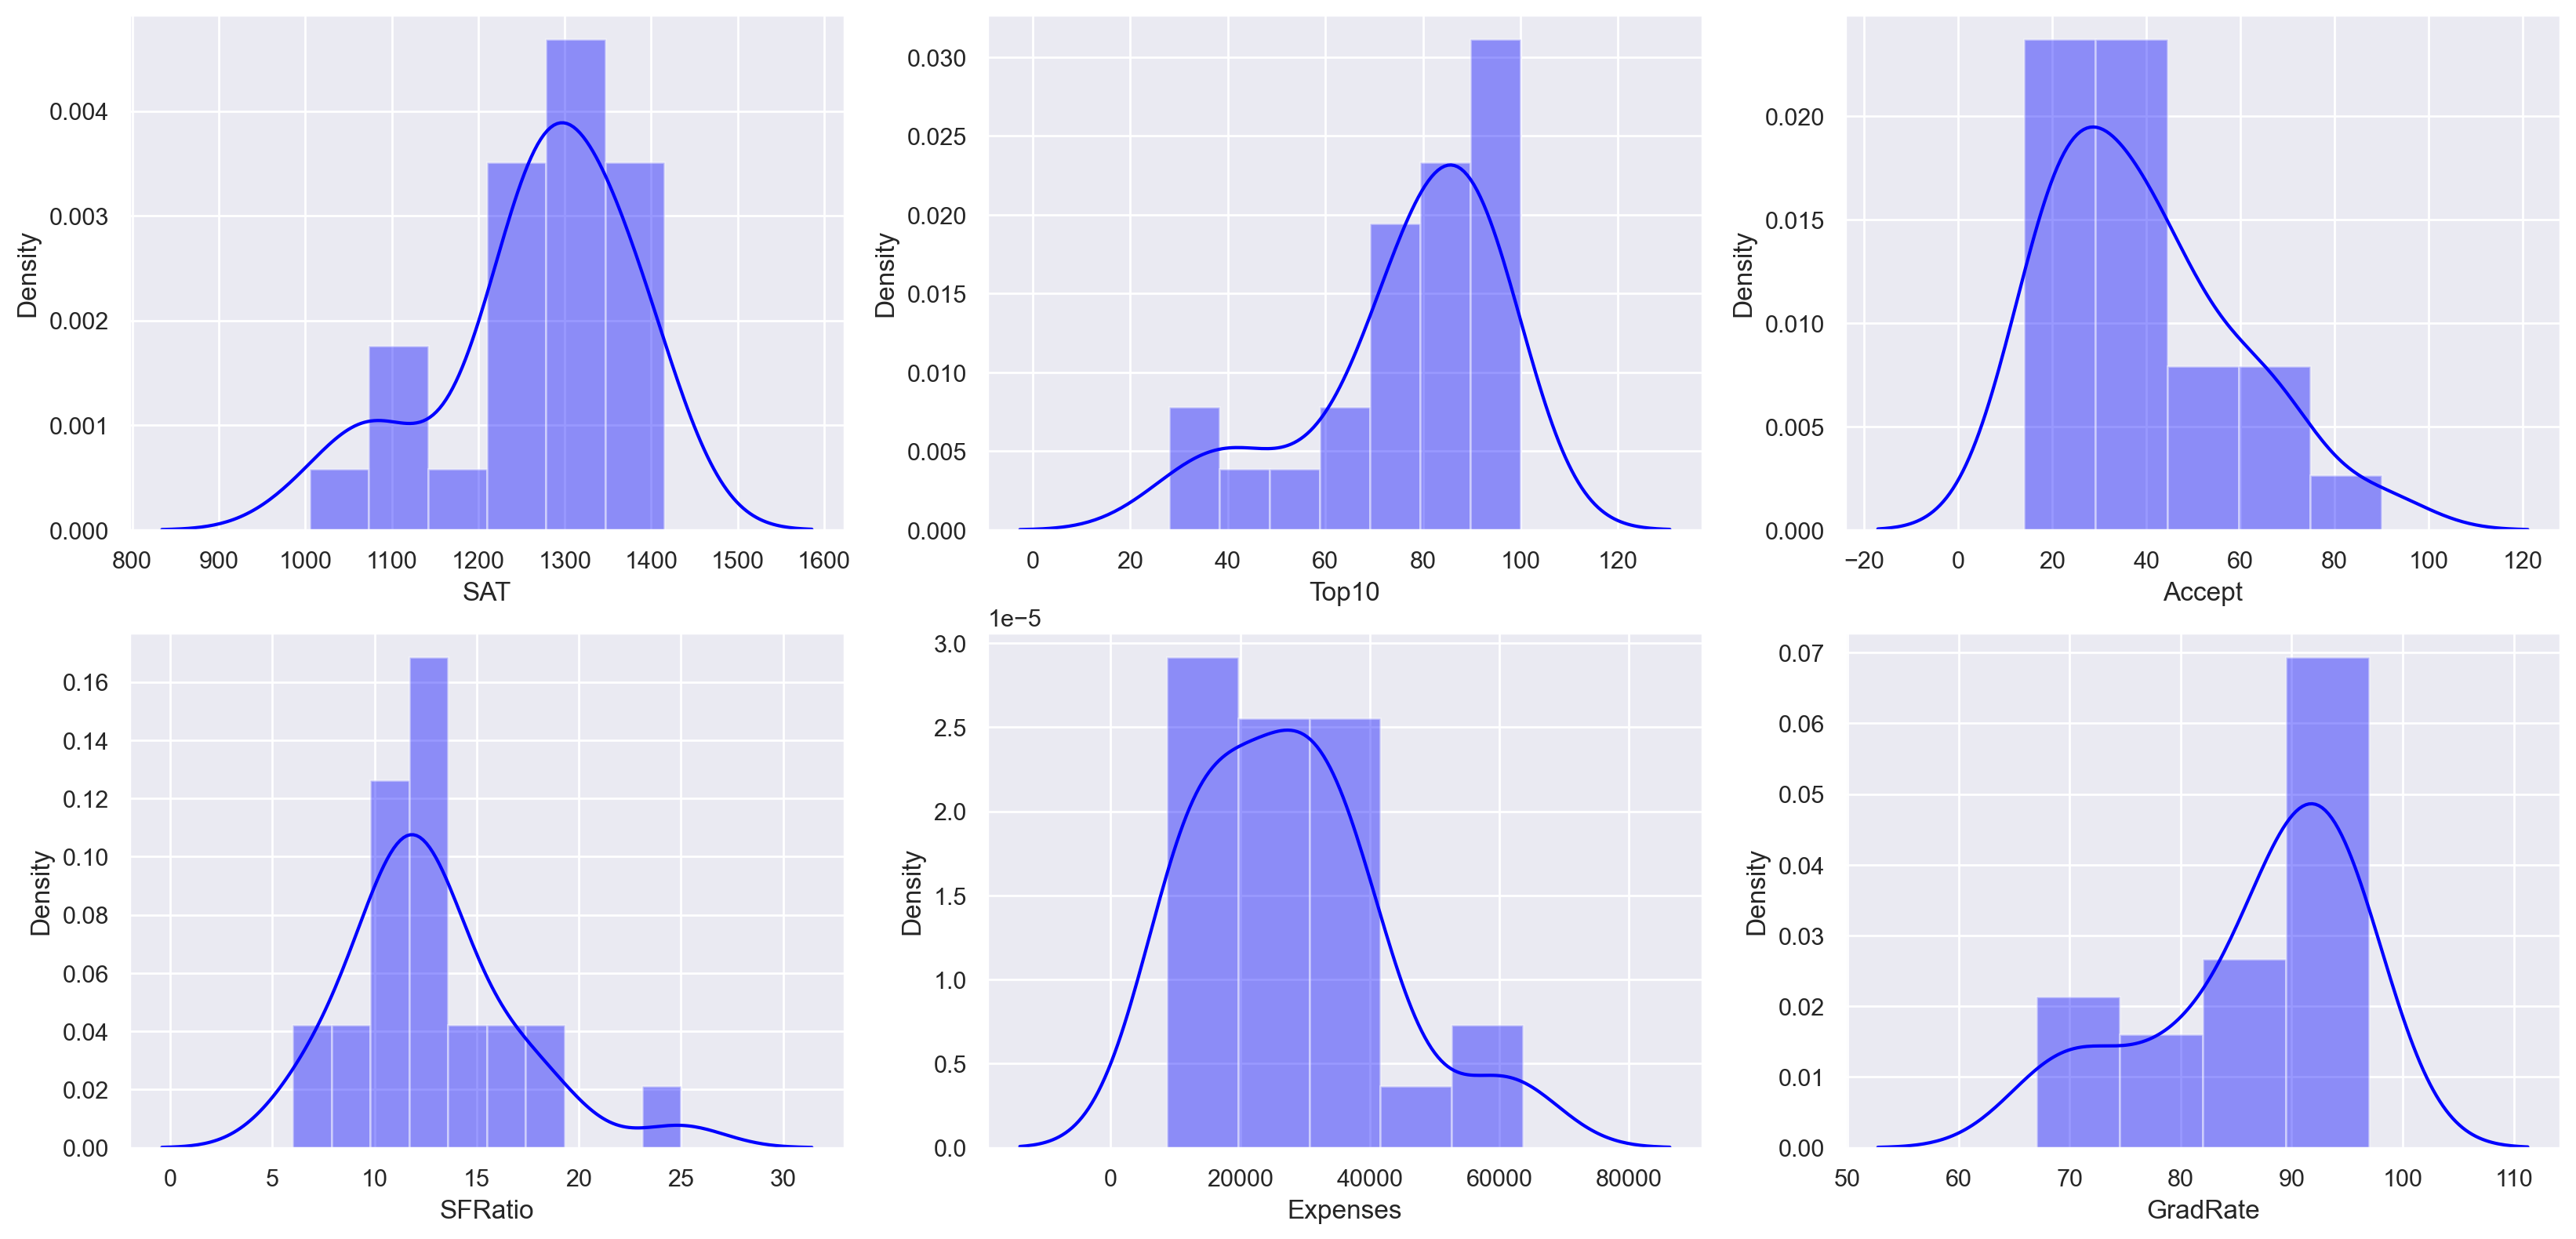

In [248]:
#Checking for outliers using boxplot
plt.figure(figsize=(20,20),dpi=200)

plt.subplot(4,3,1)
sns.distplot(univ_data.SAT,kde=True,color='blue')

plt.subplot(4,3,2)
sns.distplot(univ_data.Top10,kde=True,color='blue')

plt.subplot(4,3,3)
sns.distplot(univ_data.Accept,kde=True,color='blue')

plt.subplot(4,3,4)
sns.distplot(univ_data.SFRatio,kde=True,color='blue')

plt.subplot(4,3,5)
sns.distplot(univ_data.Expenses,kde=True,color='blue')

plt.subplot(4,3,6)
sns.distplot(univ_data.GradRate,kde=True,color='blue')

<AxesSubplot:xlabel='SAT', ylabel='Top10'>

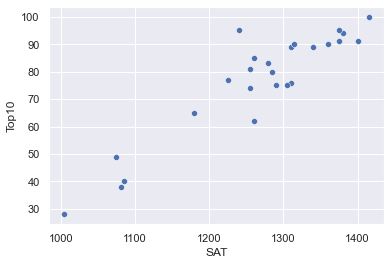

In [249]:
sns.scatterplot(y='Top10',x='SAT',data=univ_data)

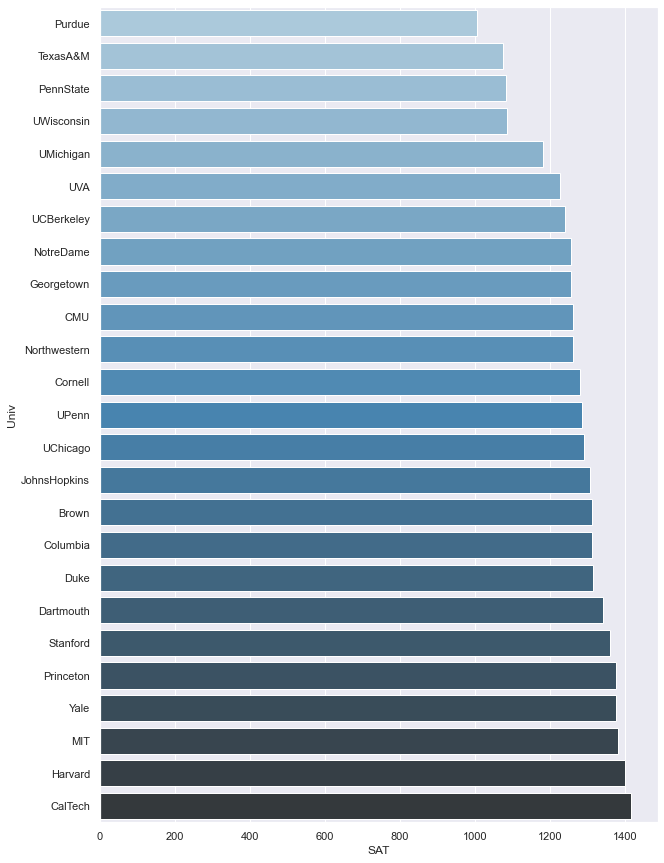

In [250]:
plt.figure(figsize=(10,15))
sns.barplot(x='SAT',y='Univ',data=univ_data, order=univ_data.sort_values('SAT').Univ, palette="Blues_d")
plt.show()

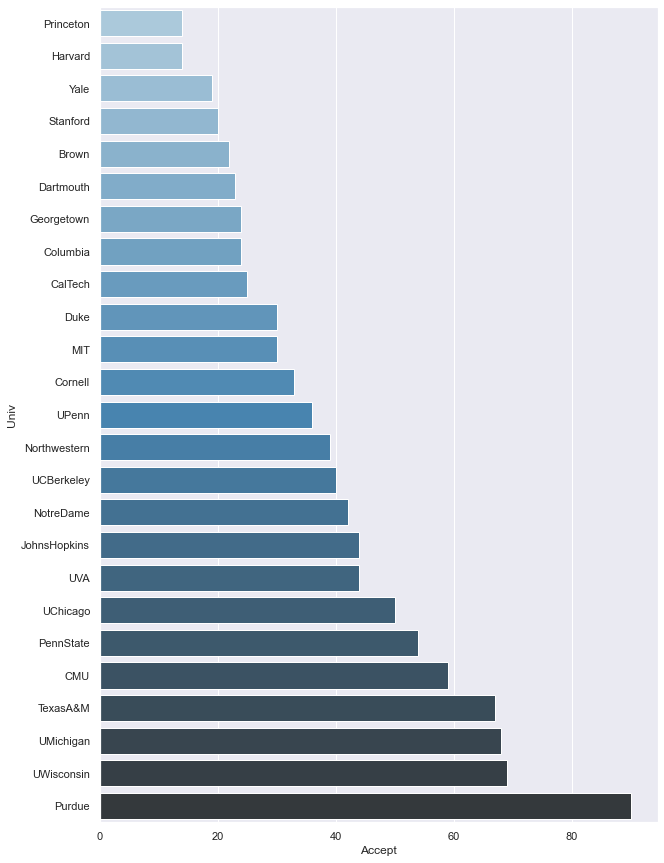

In [251]:
plt.figure(figsize=(10,15))
sns.barplot(x='Accept',y='Univ',data=univ_data, order=univ_data.sort_values('Accept').Univ, palette="Blues_d")
plt.show()

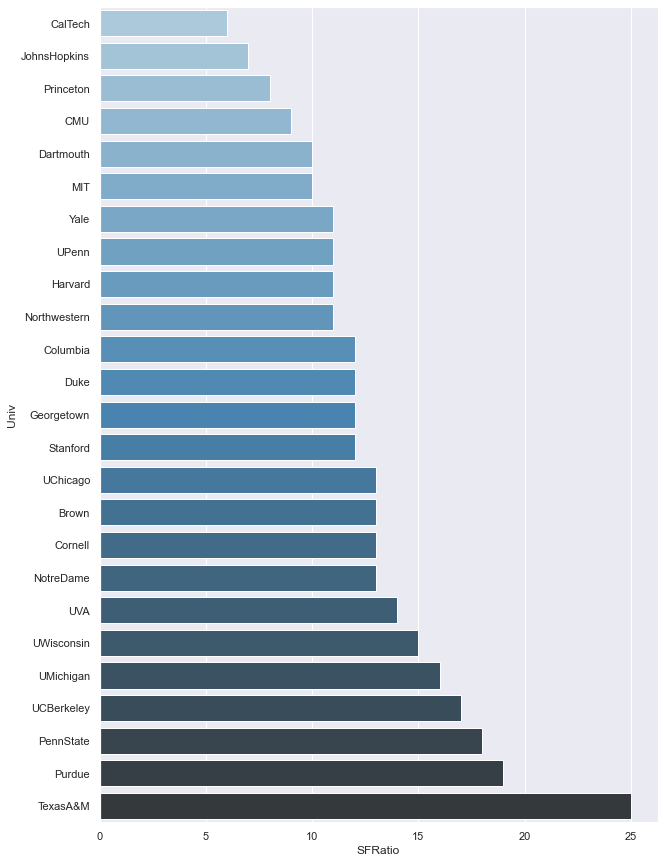

In [252]:
plt.figure(figsize=(10,15))
sns.barplot(x='SFRatio',y='Univ',data=univ_data, order=univ_data.sort_values('SFRatio').Univ, palette="Blues_d")
plt.show()

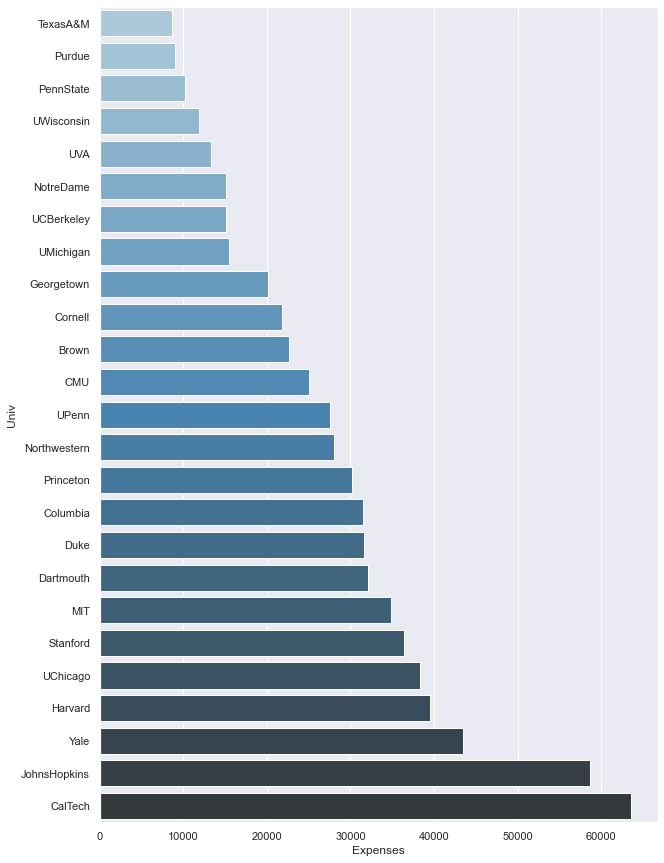

In [253]:
plt.figure(figsize=(10,15))
sns.barplot(x='Expenses',y='Univ',data=univ_data, order=univ_data.sort_values('Expenses').Univ, palette="Blues_d")
plt.show()

In [254]:
univ_data1= univ_data.copy()
univ_data1

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90
5,Dartmouth,NH,1340,89,23,10,32162,95
6,Duke,NC,1315,90,30,12,31585,95
7,Georgetown,DC,1255,74,24,12,20126,92
8,Harvard,MA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,1305,75,44,7,58691,87


In [255]:
univ_data1.drop(['State','Univ'], inplace=True, axis=1)
univ_data1.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


## ## Preprocessing the data

In [256]:
## Scaling the data so that all the features become comparable
scale= StandardScaler()
scale_dataset= scale.fit_transform(univ_data1)
scale_dataset

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [257]:
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
normalize_dataset = normalize(scale_dataset)

In [258]:
# Converting the numpy array into a pandas DataFrame
normalize_dataset = pd.DataFrame(normalize_dataset)
normalize_dataset.head()

,0,1,2,3,4,5
0,0.277867,0.445309,-0.602667,0.047584,-0.224451,0.555554
1,0.376153,0.332053,-0.197493,-0.453303,0.688289,-0.173263
2,-0.026393,-0.330893,0.445734,-0.406172,-0.072719,-0.721714
3,0.426388,-0.026198,-0.817262,-0.187762,0.303097,0.149890
4,0.175313,0.470013,-0.440298,0.096443,-0.536493,0.507312


## Reducing the dimensionality of the Data

In [259]:
pca=PCA()
pca.fit(normalize_dataset)

PCA()

In [260]:
var=pca.explained_variance_ratio_
var

array([0.58090759, 0.22949284, 0.07081266, 0.05973565, 0.04679904,
       0.01225221])

In [261]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 58.09,  81.04,  88.12,  94.09,  98.77, 100.  ])

Text(0, 0.5, 'Cumulative Explained Variance')

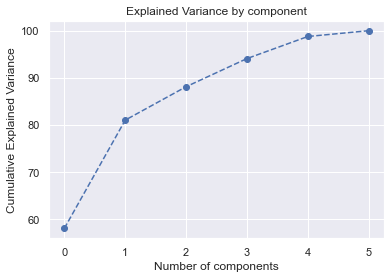

In [262]:
plt.plot(var1,marker='o',linestyle='--')
plt.title('Explained Variance by component')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). To preserve around 90 % of the variance. So, in this instance, we decide to keep 3 components.

In [263]:
#PCA with choose number of component
#We choose three components. 
pca= PCA(n_components=3)
# fit the model with our selected number of components. in our case five
X_principal= pca.fit_transform(normalize_dataset)
X_principal= pd.DataFrame(X_principal)
X_principal.columns= ['P1','P2','P3']
X_principal.head()

,P1,P2,P3
0,-0.503292,-0.560670,-0.199336
1,-0.481664,0.756100,-0.107245
2,0.771471,0.668909,0.135131
3,-0.575071,0.134007,-0.490748
4,-0.247692,-0.759919,-0.094817


## Hierarchical Clustering

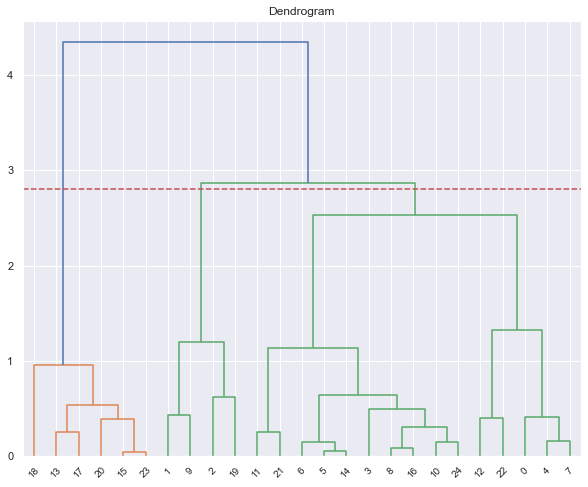

In [264]:
#Combine PCA and Hierarchical Clustering. Visualizing the working of the Dendograms 
plt.figure(figsize=(10,8))
plt.title('Dendrogram')
dendrogram= sch.dendrogram(sch.linkage(X_principal,method='ward',metric='euclidean'))
plt.axhline(y=2.8, color='r', linestyle='--')

## Building and Visualizing the different clustering models for different values of k

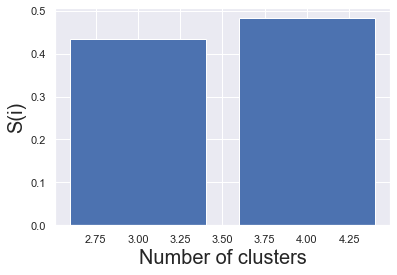

In [265]:
#Method 2: Silhouette Score method for best cluster
k = [3, 4]
cluster3 = AgglomerativeClustering(n_clusters = 3,linkage='ward',affinity='euclidean')
cluster4 = AgglomerativeClustering(n_clusters = 4,linkage='ward',affinity='euclidean')
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, cluster3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, cluster4.fit_predict(X_principal)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

The above image shows that the optimal number of clusters should be 4 for the given data.

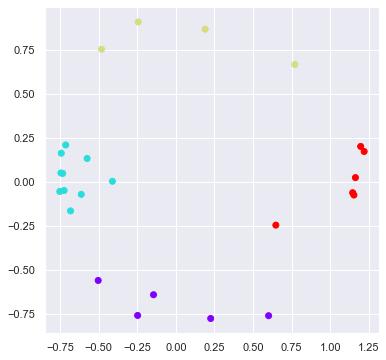

In [266]:
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = cluster4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [267]:
#when k=4
#We have four cluster now we will use Agglomerative Clustering
# Ward method is commanly used since it is simpler to visualize understanding.
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(X_principal) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
univ_data['HR_clust_pca']=cluster_labels # creating a  new column and assigning it to new column 
univ_data.iloc[:,2:].groupby(univ_data.HR_clust_pca).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,HR_clust_pca
HR_clust_pca,,,,,,,
0,1317.500000,78.000000,44.500000,8.750000,46418.000000,81.750000,0.0
1,1111.000000,52.500000,64.666667,18.333333,11737.000000,75.000000,1.0
2,1326.538462,86.692308,25.230769,11.230769,30779.615385,92.692308,2.0
3,1240.000000,79.000000,43.000000,13.500000,14235.500000,93.000000,3.0


## K-means clustering

In [268]:
#WE fit K means using the transformed data
wcss=[]
for i in range(1,21):
    kmeans_data=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans_data.fit(X_principal)
    wcss.append(kmeans_data.inertia_)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


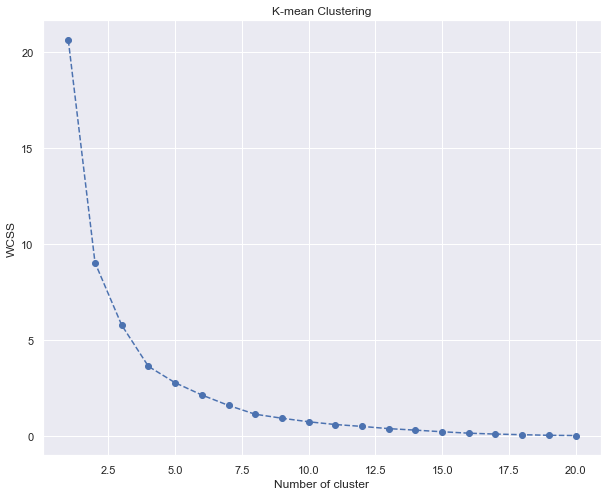

In [269]:
#The next step involves plotting the WCSS against the number of components on a graph.
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('K-mean Clustering')
plt.show()

And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. The approach consists of looking for a kink or elbow in the WCSS graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 3 clusters mark. So, we’ll be keeping a three-cluster solution.

In [270]:
#All left to do is to implement it.
#We have chosen three clusters, so we run K-means with number of clusters equals four.
#Same initilizer and random state as before.
kmeans_data=KMeans(n_clusters=3,init='k-means++',max_iter=300, n_init=10, random_state=0)

In [271]:
#We fit our data with K-means model
kmeans_data.fit(X_principal)

KMeans(n_clusters=3, random_state=0)

## Analyze the Results of K-Means Clustering

In [272]:
#The last column we add K-means clustering labels.
univ_data['K_means_segment']=kmeans_data.labels_
univ_data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,HR_clust_pca,K_means_segment
0,Brown,RI,1310,89,22,13,22704,94,2,2
1,CalTech,CA,1415,100,25,6,63575,81,0,1
2,CMU,PA,1260,62,59,9,25026,72,0,0
3,Columbia,NY,1310,76,24,12,31510,88,2,1
4,Cornell,NY,1280,83,33,13,21864,90,2,2


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


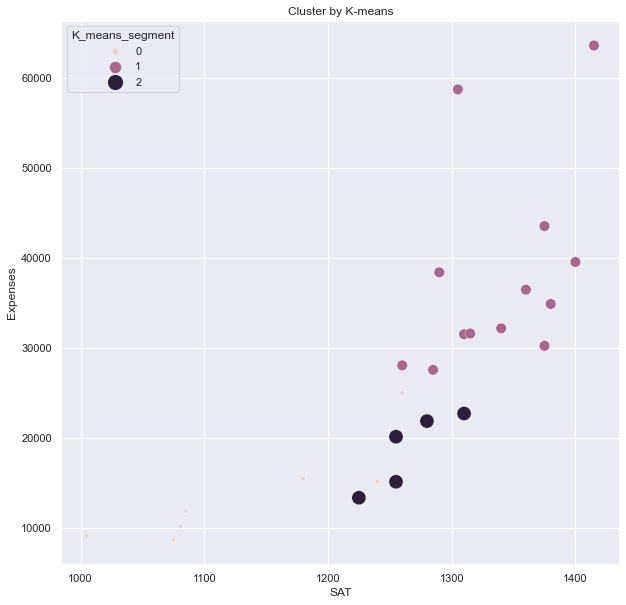

In [273]:
#let’s visualize the K-means clustering
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
sns.scatterplot(univ_data['SAT'], univ_data['Expenses'],hue=univ_data['K_means_segment'],
                cmap=matplotlib.colors.ListedColormap(colors),s=15,size=univ_data.K_means_segment, 
                sizes=(20, 200), legend="full")
plt.title('Cluster by K-means')
plt.show()

In [274]:
# As we passed n_cluster to be 4 we get 4 centres of the clusters
kmeans_data.cluster_centers_

array([[ 1.04239896,  0.0984193 , -0.08887704],
       [-0.55595303,  0.21633006,  0.02401156],
       [-0.01388068, -0.70024518,  0.06199781]])

In [275]:
univ_data.iloc[:,2:7].groupby(univ_data.K_means_segment).mean()

,SAT,Top10,Accept,SFRatio,Expenses
K_means_segment,,,,,
0,1132.285714,53.857143,63.857143,17.000000,13635.428571
1,1339.230769,87.000000,28.307692,10.307692,38160.538462
2,1265.000000,80.800000,33.000000,13.000000,18633.000000


## Working with original data

## Hierarchical Clustering

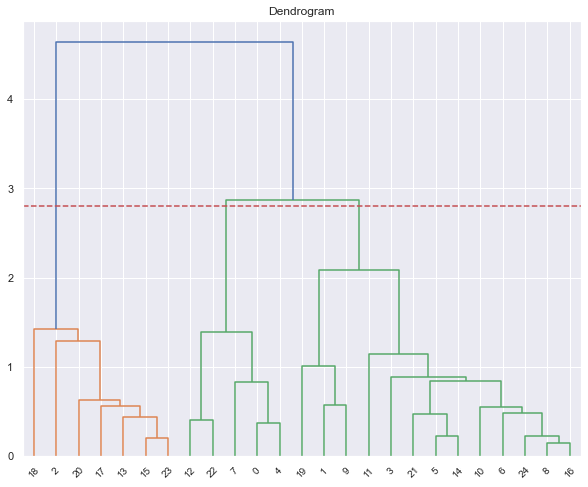

In [276]:
#Combine PCA and Hierarchical Clustering. Visualizing the working of the Dendograms 
plt.figure(figsize=(10,8))
plt.title('Dendrogram')
dendrogram= sch.dendrogram(sch.linkage(normalize_dataset,method='ward',metric='euclidean'))
plt.axhline(y=2.8, color='r', linestyle='--')

While working with orginal dataset on Hierarchical Clustering only 3 clusters are formed and there scales are large. 

## K-means clustering

In [277]:
#WE fit K means using the transformed data
wcss=[]
for i in range(1,10):
    kmeans_data=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans_data.fit(normalize_dataset)
    wcss.append(kmeans_data.inertia_)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


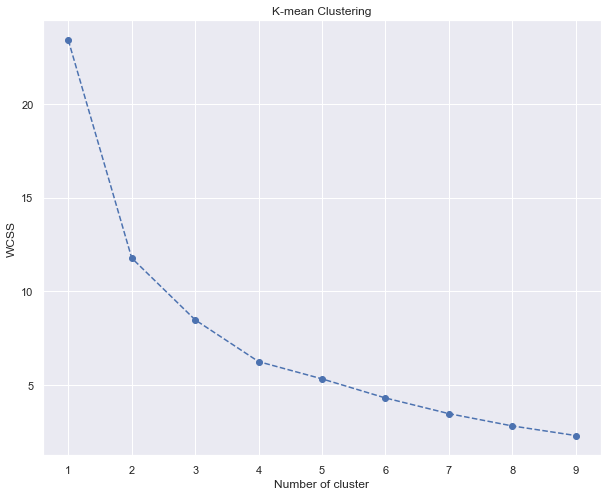

In [278]:
#The next step involves plotting the WCSS against the number of components on a graph.
plt.figure(figsize=(10,8))
plt.plot(range(1,10),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('K-mean Clustering')
plt.show()

But, as working with K-means clustering on original dataset there is no change in cluster. 

## Working on Dataset-2

## Working Problem

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [279]:
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Understanding of the dataset

Prediction of Quality ranking from the chemical properties of the wines

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on the volatility of wine tasters.

In [280]:
wine_data.shape

(178, 14)

In [281]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [282]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [283]:
#checking missing value
wine_data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [284]:
round(100*(wine_data.isna().sum()/len(wine_data.index)),2)

Type               0.0
Alcohol            0.0
Malic              0.0
Ash                0.0
Alcalinity         0.0
Magnesium          0.0
Phenols            0.0
Flavanoids         0.0
Nonflavanoids      0.0
Proanthocyanins    0.0
Color              0.0
Hue                0.0
Dilution           0.0
Proline            0.0
dtype: float64

In [285]:
# Check for rows containing duplicate
duplicate= wine_data[wine_data.duplicated()]
duplicate.shape

(0, 14)

<AxesSubplot:xlabel='Proline'>

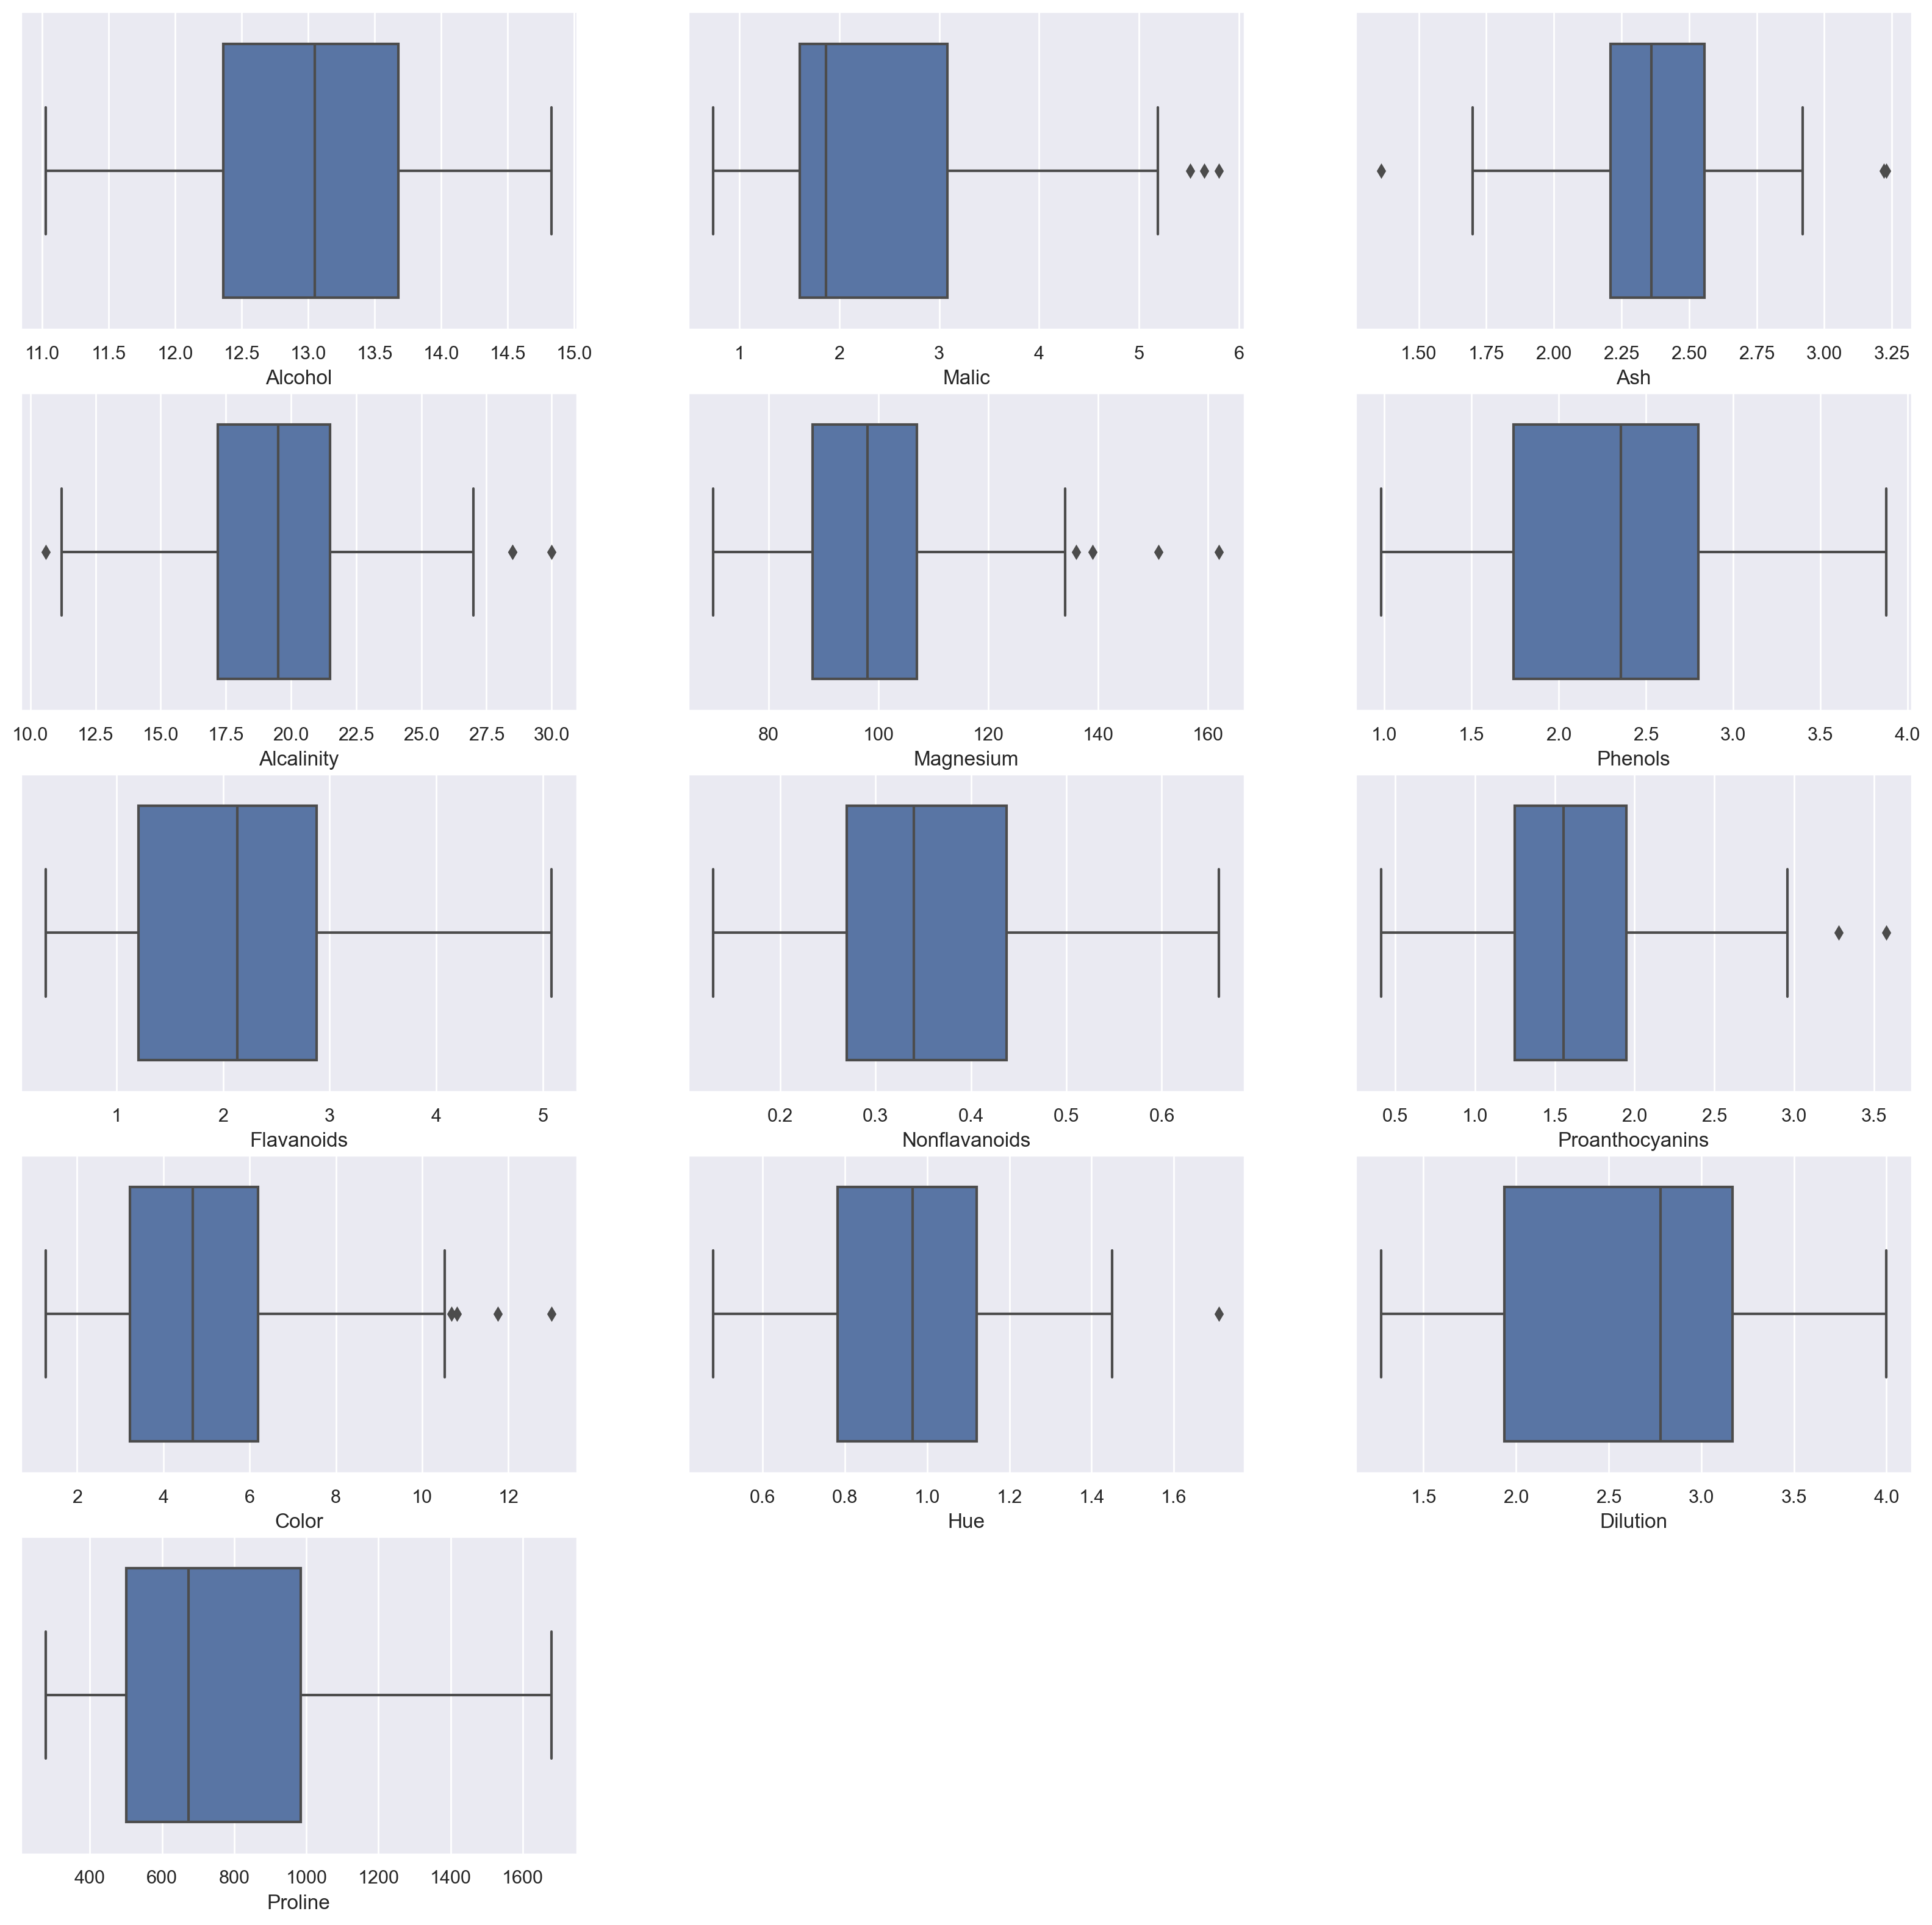

In [286]:
#Checking for outliers using boxplot
plt.figure(figsize=(20,20),dpi=200)

plt.subplot(5,3,1)
sns.boxplot(x='Alcohol',data=wine_data)

plt.subplot(5,3,2)
sns.boxplot(x='Malic',data=wine_data)

plt.subplot(5,3,3)
sns.boxplot(x='Ash',data=wine_data)

plt.subplot(5,3,4)
sns.boxplot(x='Alcalinity',data=wine_data)

plt.subplot(5,3,5)
sns.boxplot(x='Magnesium',data=wine_data)

plt.subplot(5,3,6)
sns.boxplot(x='Phenols',data=wine_data)

plt.subplot(5,3,7)
sns.boxplot(x='Flavanoids',data=wine_data)

plt.subplot(5,3,8)
sns.boxplot(x='Nonflavanoids',data=wine_data)

plt.subplot(5,3,9)
sns.boxplot(x='Proanthocyanins',data=wine_data)

plt.subplot(5,3,10)
sns.boxplot(x='Color',data=wine_data)

plt.subplot(5,3,11)
sns.boxplot(x='Hue',data=wine_data)

plt.subplot(5,3,12)
sns.boxplot(x='Dilution',data=wine_data)

plt.subplot(5,3,13)
sns.boxplot(x='Proline',data=wine_data)

In [287]:
wine_data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [288]:
#Finding Outliers
#position of the outliers
print(np.where(wine_data.Malic > 5.2))

(array([123, 137, 173], dtype=int64),)


In [289]:
#seeing the row data
result= wine_data.iloc[[123, 137, 173]]
result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [290]:
#Finding Outliers
#position of the outliers
print(np.where(wine_data.Ash > 3))
print(np.where(wine_data.Ash < 1.5))

(array([ 25, 121], dtype=int64),)
(array([59], dtype=int64),)


In [291]:
#seeing the row data
result= wine_data.iloc[[25, 121, 59]]
result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [292]:
#Finding Outliers
#position of the outliers
print(np.where(wine_data.Alcalinity > 27.5))
print(np.where(wine_data.Alcalinity < 11))

(array([ 73, 121, 127], dtype=int64),)
(array([59], dtype=int64),)


In [293]:
#seeing the row data
result= wine_data.iloc[[73, 121, 127, 59]]
result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [294]:
#Finding Outliers
#position of the outliers
print(np.where(wine_data.Magnesium > 135))

(array([69, 73, 78, 95], dtype=int64),)


In [295]:
#seeing the row data
result= wine_data.iloc[[69, 73, 78, 95]]
result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [296]:
#Finding Outliers
#position of the outliers
print(np.where(wine_data.Proanthocyanins > 3))

(array([ 95, 110], dtype=int64),)


In [297]:
#seeing the row data
result= wine_data.iloc[[95, 110]]
result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


In [298]:
#Finding Outliers
#position of the outliers
print(np.where(wine_data.Color > 11))

(array([158, 159], dtype=int64),)


In [299]:
#seeing the row data
result= wine_data.iloc[[158, 159]]
result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
158,3,14.34,1.68,2.70,25.0,98,2.8,1.31,0.53,2.70,13.00,0.57,1.96,660
159,3,13.48,1.67,2.64,22.5,89,2.6,1.10,0.52,2.29,11.75,0.57,1.78,620


In [300]:
#Finding Outliers
#position of the outliers
print(np.where(wine_data.Hue > 1.6))

(array([115], dtype=int64),)


In [301]:
#seeing the row data
result= wine_data.iloc[[115]]
result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
115,2,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


In [302]:
wine_data.head(50)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


## Data Preparation

the most important step in data preparation is to identify outliers. Since this is a multivariate data, we consider only those points which do not have any predictor variable value to be outside of limits constructed by boxplots. The following rule is applied:

A predictor value is considered to be an outlier only if it is greater than Q3 + 1.5IQR or Q1-1.5IQR

The rationale behind this rule is that the extreme outliers are all on the higher end of the values and the distributions are all positively skewed. Application of this rule reduces the data size from 

In [303]:
#Column Malic
Q1= wine_data.Malic.quantile(0.25)
Q3= wine_data.Malic.quantile(0.75)
IQR= Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+(1.5*IQR)
upper= wine_data.Malic>=upper_limit
print(np.where(upper))
lower= wine_data.Malic<=lower_limit
print(np.where(lower))

(array([123, 137, 173], dtype=int64),)
(array([], dtype=int64),)


In [304]:
#Column Ash
Q1= wine_data.Ash.quantile(0.25)
Q3= wine_data.Ash.quantile(0.75)
IQR= Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+(1.5*IQR)
upper= wine_data.Ash>=upper_limit
print(np.where(upper))
lower= wine_data.Ash<=lower_limit
print(np.where(lower))

(array([ 25, 121], dtype=int64),)
(array([59], dtype=int64),)


In [305]:
#Column Alcalinity
Q1= wine_data.Alcalinity.quantile(0.25)
Q3= wine_data.Alcalinity.quantile(0.75)
IQR= Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+(1.5*IQR)
upper= wine_data.Alcalinity>=upper_limit
print(np.where(upper))
lower= wine_data.Alcalinity<=lower_limit
print(np.where(lower))

(array([ 73, 121, 127], dtype=int64),)
(array([59], dtype=int64),)


In [306]:
#Column Magenisium
Q1= wine_data.Magnesium.quantile(0.25)
Q3= wine_data.Magnesium.quantile(0.75)
IQR= Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+(1.5*IQR)
upper= wine_data.Magnesium>=upper_limit
print(np.where(upper))
lower= wine_data.Magnesium<=lower_limit
print(np.where(lower))

(array([69, 73, 78, 95], dtype=int64),)
(array([], dtype=int64),)


In [307]:
#Column Proanthocyanins
Q1= wine_data.Proanthocyanins.quantile(0.25)
Q3= wine_data.Proanthocyanins.quantile(0.75)
IQR= Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+(1.5*IQR)
upper= wine_data.Proanthocyanins>=upper_limit
print(np.where(upper))
lower= wine_data.Proanthocyanins<=lower_limit
print(np.where(lower))

(array([ 95, 110], dtype=int64),)
(array([], dtype=int64),)


In [308]:
#Column Color
Q1= wine_data.Color.quantile(0.25)
Q3= wine_data.Color.quantile(0.75)
IQR= Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+(1.5*IQR)
upper= wine_data.Color>=upper_limit
print(np.where(upper))
lower= wine_data.Color<=lower_limit
print(np.where(lower))

(array([151, 158, 159, 166], dtype=int64),)
(array([], dtype=int64),)


In [309]:
#Column Hue
Q1= wine_data.Hue.quantile(0.25)
Q3= wine_data.Hue.quantile(0.75)
IQR= Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+(1.5*IQR)
upper= wine_data.Hue>=upper_limit
print(np.where(upper))
lower= wine_data.Hue<=lower_limit
print(np.where(lower))

(array([115], dtype=int64),)
(array([], dtype=int64),)


In [311]:
wine_data.shape

(178, 14)

We are keeping up the outliers as the dataset is not too big for us to remove outliers.

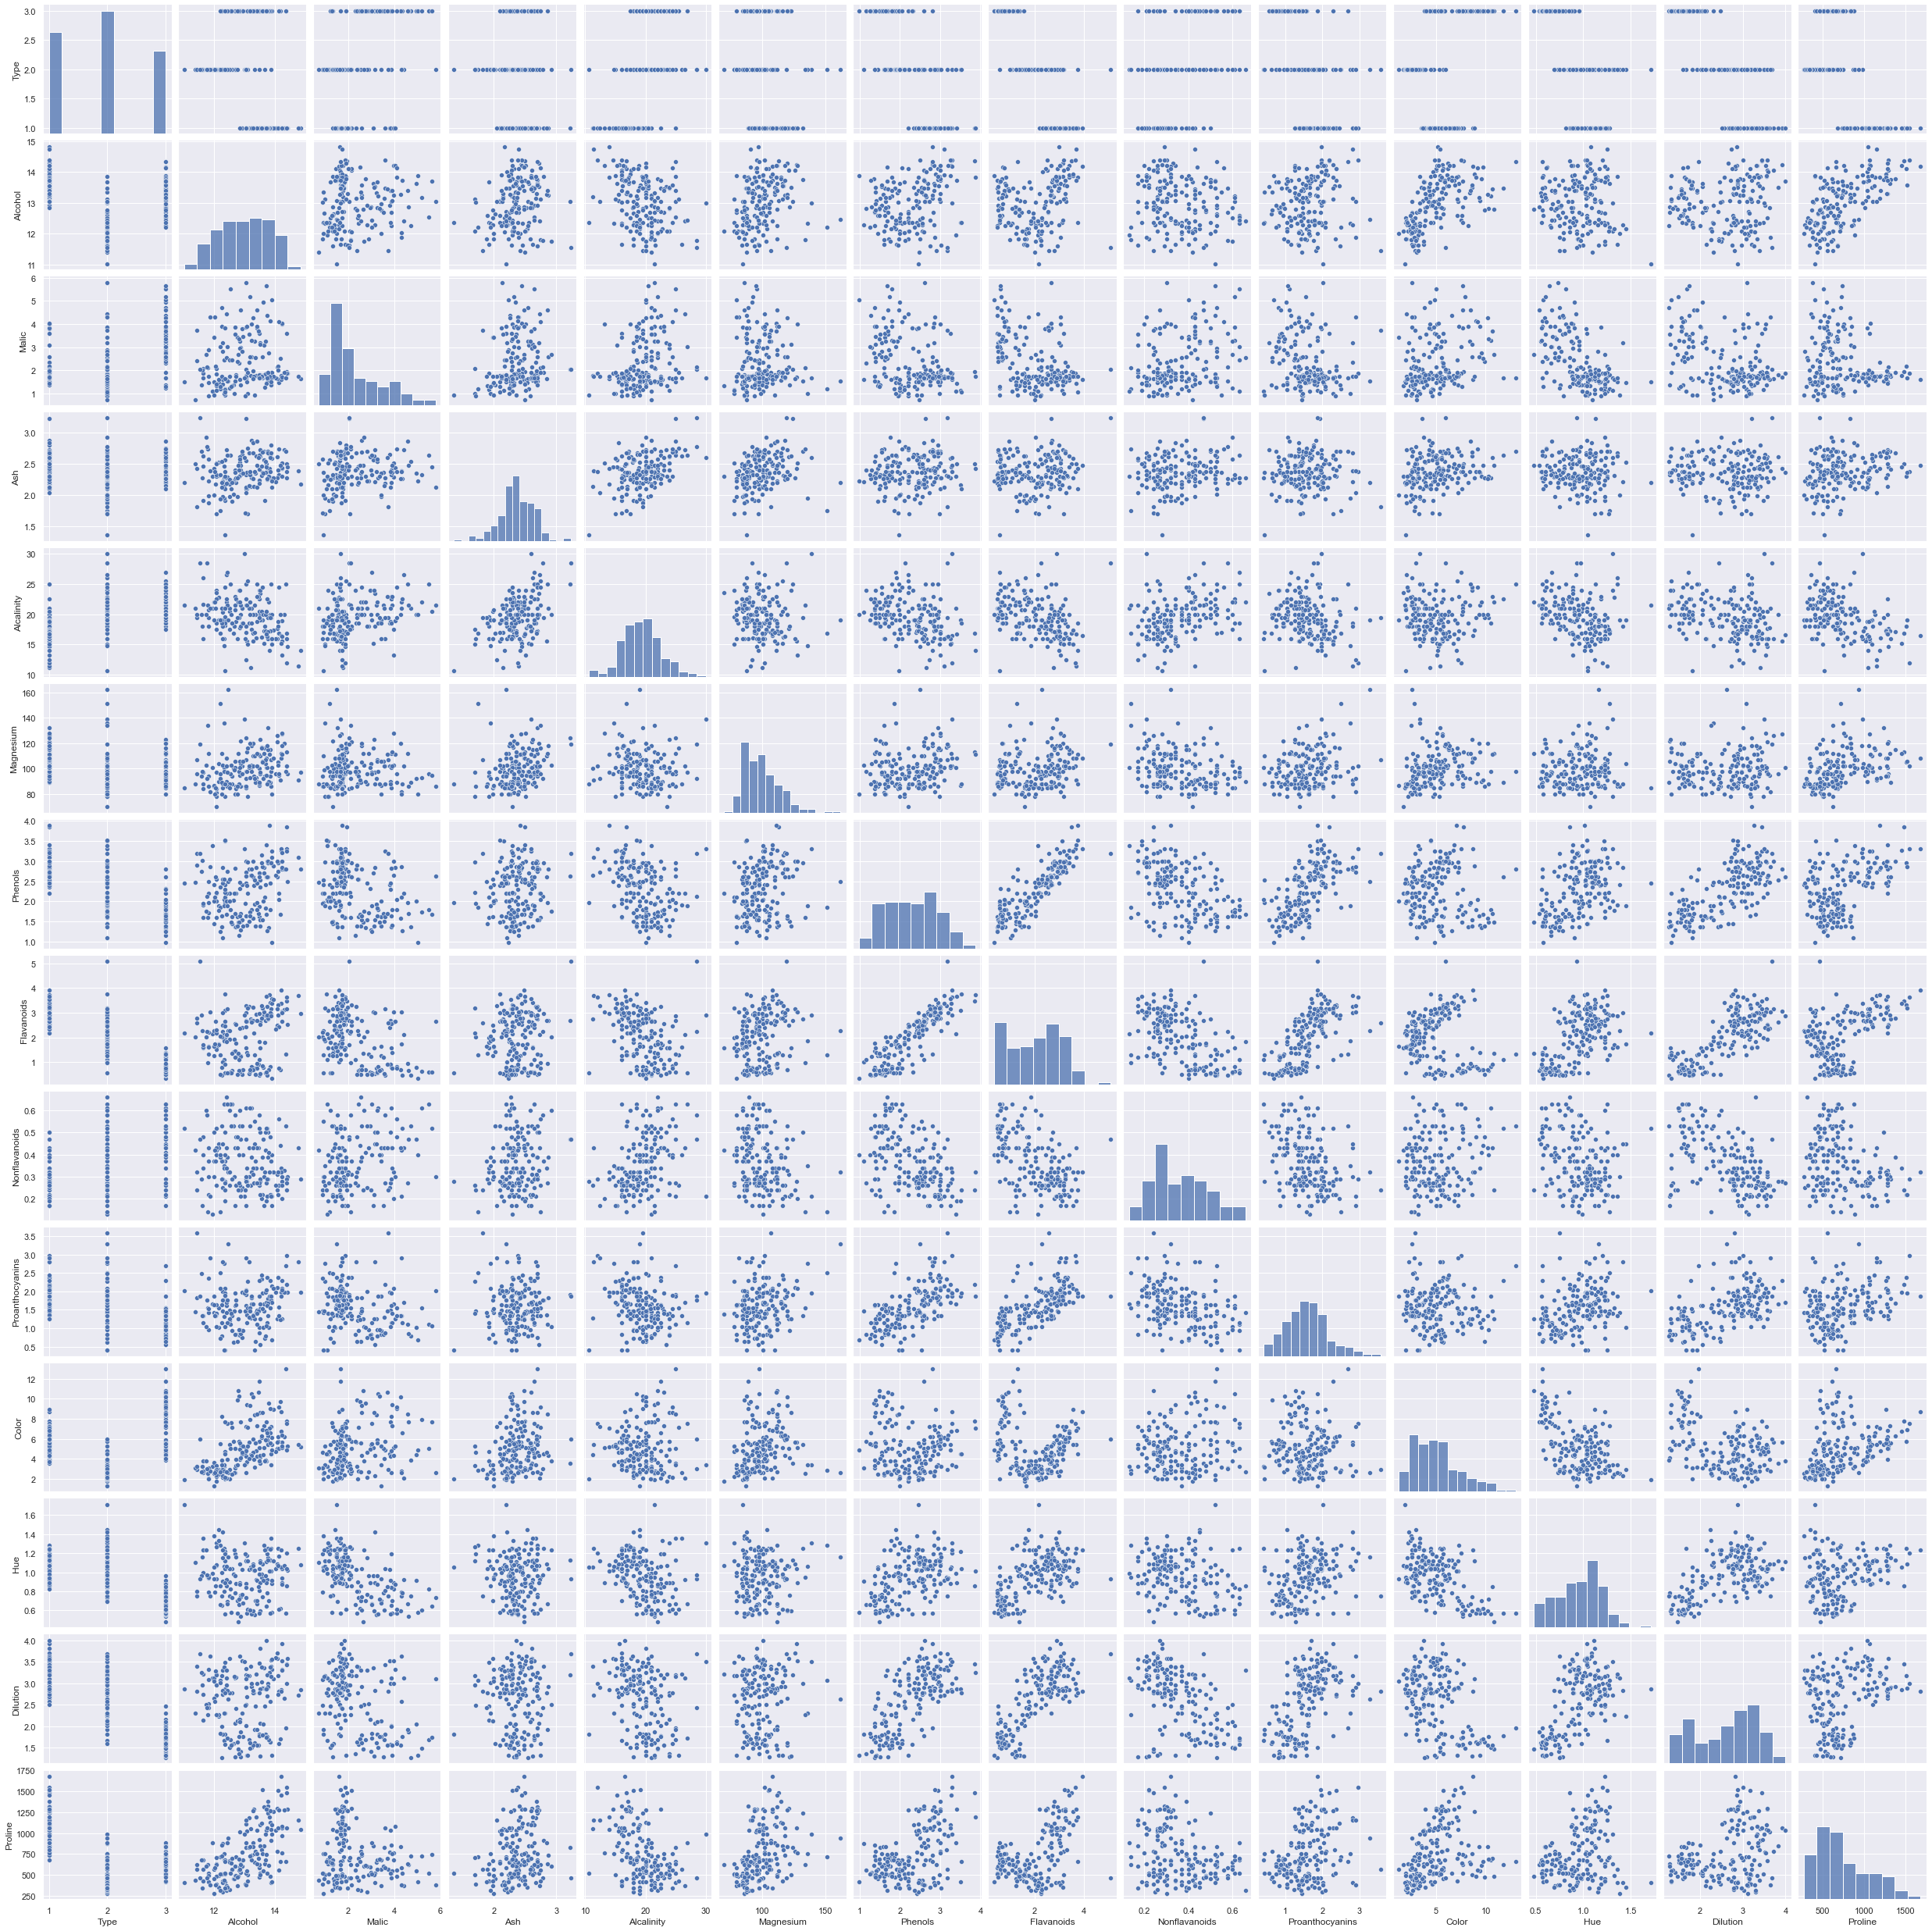

In [312]:
sns.pairplot(wine_data)

<AxesSubplot:>

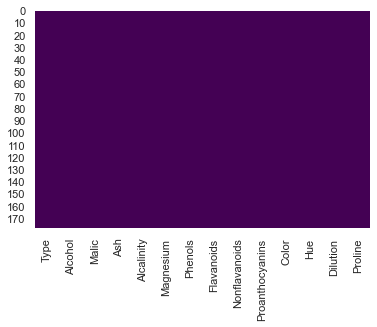

In [313]:
# Visualizing null values
sns.heatmap(wine_data.isnull(),cbar=False, cmap='viridis')

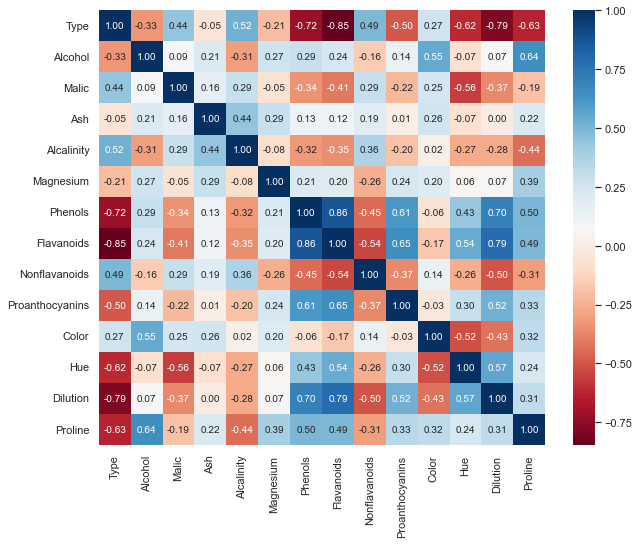

In [314]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_data.corr(),annot=True, cmap='RdBu',fmt='.2f')
plt.show()

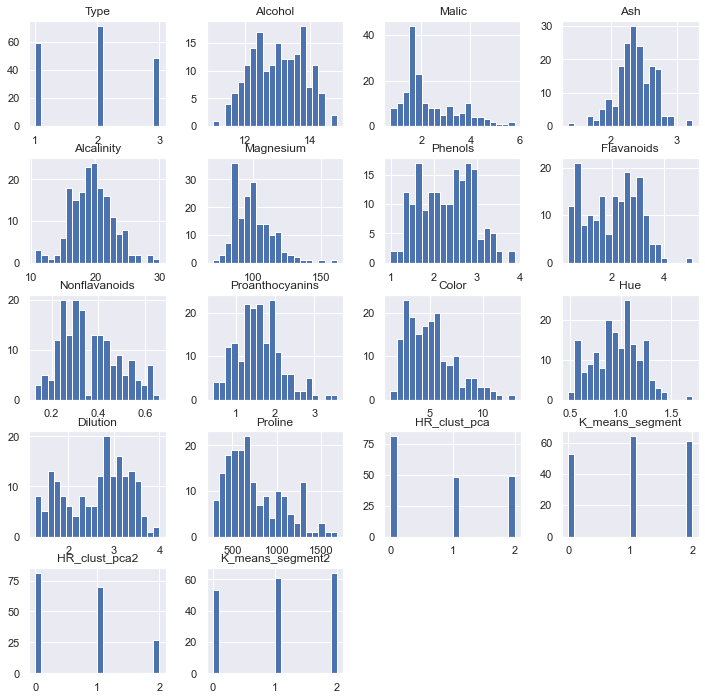

In [379]:
#plot histogram
wine_data.hist(bins=20, figsize=(12,12))
plt.show()

In [315]:
wine_data_copy= wine_data.copy()
wine_data_copy

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [316]:
wine_data_copy.drop(['Type'],inplace=True,axis=1)
wine_data_copy

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Preprocessing the data

In [317]:
## Scaling the data so that all the features become comparable
scale= StandardScaler()
scale_dataset= scale.fit_transform(wine_data_copy)
scale_dataset

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [318]:
# Normalizing the data so that the data approximately
# follows a Gaussian distribution
normalize_dataset= normalize(scale_dataset)

In [319]:
normalize_dataset=pd.DataFrame(normalize_dataset)
normalize_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196


## Reducing the dimensionality of the Data

In [320]:
pca= PCA()
pca.fit(normalize_dataset)

PCA()

In [321]:
var=pca.explained_variance_ratio_
var

array([0.35836838, 0.20399079, 0.09913391, 0.07500169, 0.05486393,
       0.04963898, 0.04073446, 0.03006328, 0.02628357, 0.02219101,
       0.01839141, 0.01370277, 0.00763581])

In [322]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 35.84,  56.24,  66.15,  73.65,  79.14,  84.1 ,  88.17,  91.18,
        93.81,  96.03,  97.87,  99.24, 100.  ])

Text(0, 0.5, 'Cumulative Explained Variance')

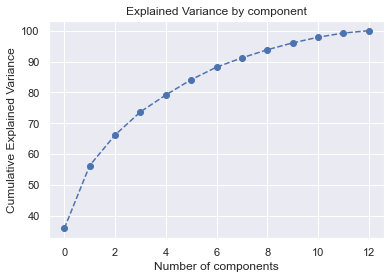

In [323]:
plt.plot(var1,marker='o',linestyle='--')
plt.title('Explained Variance by component')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

In [324]:
#PCA with choose number of component
#We choose three components.
pca= PCA(n_components=3)
# fit the model with our selected number of components. in our case five
X_principal= pca.fit_transform(normalize_dataset)
X_principal= pd.DataFrame(X_principal)
X_principal.columns= ['P1','P2','P3']
X_principal.head()

,P1,P2,P3
0,-0.832433,-0.318834,-0.013979
1,-0.639443,0.091947,-0.576623
2,-0.756882,-0.243317,0.328412
3,-0.805447,-0.510057,-0.006183
4,-0.373903,-0.311604,0.795363


## Hierarchical Clustering

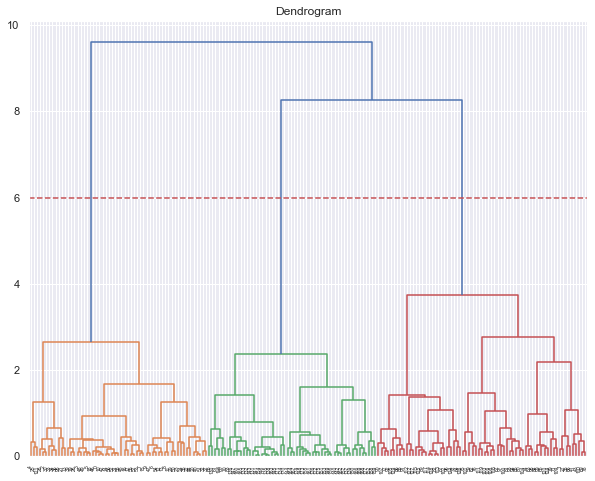

In [325]:
#Combine PCA and Hierarchical Clustering. Visualizing the working of the Dendograms
plt.figure(figsize=(10,8))
plt.title('Dendrogram')
dendrogram= sch.dendrogram(sch.linkage(X_principal,method='ward',metric='euclidean'))
plt.axhline(y=6, color='r', linestyle='--')

## Building and Visualizing the different clustering models for different values of k

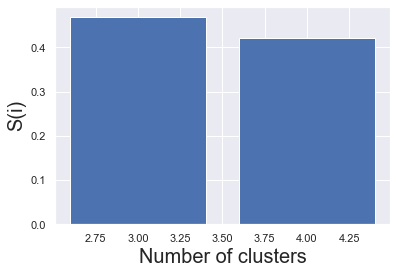

In [326]:
#Method 2: Silhouette Score method for best cluster
k = [3, 4]
cluster3 = AgglomerativeClustering(n_clusters = 3,linkage='ward',affinity='euclidean')
cluster4 = AgglomerativeClustering(n_clusters = 4,linkage='ward',affinity='euclidean')
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
silhouette_score(X_principal, cluster3.fit_predict(X_principal)))
silhouette_scores.append(
silhouette_score(X_principal, cluster4.fit_predict(X_principal)))
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

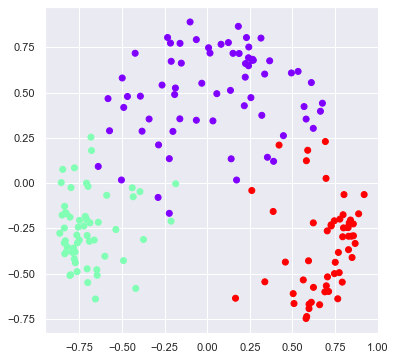

In [327]:
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = cluster3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [328]:
#when k=3
#We have three cluster now we will use Agglomerative Clustering
# Ward method is commanly used since it is simpler to visualize understanding.
h_complete = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(X_principal)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
wine_data['HR_clust_pca']=cluster_labels # creating a new column and assigning it to new column
wine_data.iloc[:,1:].groupby(wine_data.HR_clust_pca).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,HR_clust_pca
HR_clust_pca,,,,,,,,,,,,,,
0,12.788148,2.836667,2.409753,21.443210,96.283951,1.807531,1.194568,0.448148,1.241728,5.589877,0.819580,2.048519,574.358025,0.0
1,13.424583,2.106250,2.559583,18.708333,108.916667,2.904792,3.029792,0.302292,1.996042,5.212917,1.067708,3.154375,1022.729167,1.0
2,12.936531,1.734694,2.105918,17.044898,96.469388,2.503878,2.428980,0.277551,1.771224,4.027347,1.077347,3.011020,761.897959,2.0


## K-means clustering

In [329]:
#WE fit K means using the transformed data
wcss=[]
for i in range(1,21):
    kmeans_data1=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans_data1.fit(X_principal)
    wcss.append(kmeans_data1.inertia_)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


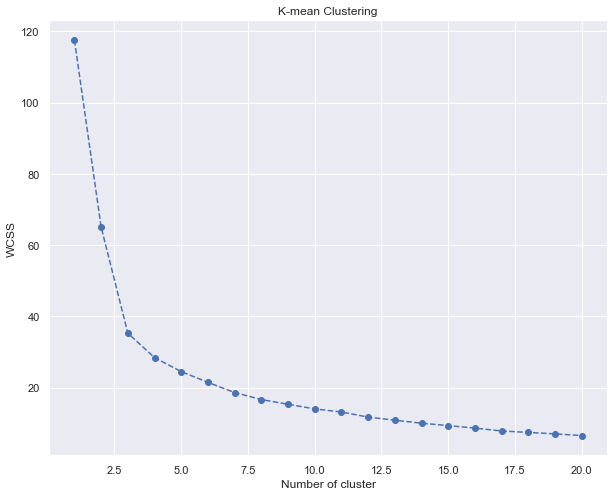

In [330]:
#The next step involves plotting the WCSS against the number of components on a graph.
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('K-mean Clustering')
plt.show()

In [331]:
#All left to do is to implement it.
#We have chosen three clusters, so we run K-means with number of clusters equals four.
#Same initilizer and random state as before.
kmeans_data1=KMeans(n_clusters=3,init='k-means++',max_iter=300, n_init=10, random_state=0)

In [332]:
#We fit our data with K-means model
kmeans_data1.fit(X_principal)

KMeans(n_clusters=3, random_state=0)

## Analyze the Results of K-Means Clustering

In [333]:
#The last column we add K-means clustering labels.
wine_data['K_means_segment']=kmeans_data1.labels_
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,HR_clust_pca,K_means_segment
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


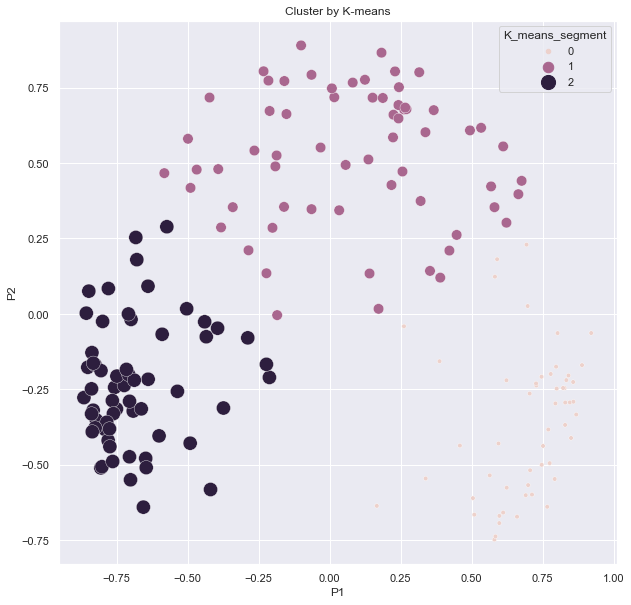

In [334]:
#let’s visualize the K-means clustering
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
sns.scatterplot(X_principal['P1'], X_principal['P2'],hue=wine_data['K_means_segment'],
cmap=matplotlib.colors.ListedColormap(colors),s=15,size=wine_data.K_means_segment,
sizes=(20, 200), legend="full")
plt.title('Cluster by K-means')
plt.show()

In [335]:
# As we passed n_cluster to be 4 we get 4 centres of the clusters
kmeans_data1.cluster_centers_

array([[ 0.68982732, -0.35903307, -0.06841771],
       [ 0.08059133,  0.52106168,  0.06514292],
       [-0.683913  , -0.2347409 , -0.00890178]])

In [336]:
wine_data.iloc[:,1:14].groupby(wine_data.K_means_segment).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
K_means_segment,,,,,,,,,,,,,
0,13.122075,3.230566,2.412642,21.145283,98.962264,1.688868,0.831698,0.452264,1.138113,7.079057,0.702189,1.703396,626.264151
1,12.222500,1.919219,2.245156,20.237500,92.718750,2.275781,2.125156,0.356250,1.649375,3.016094,1.063750,2.846250,500.093750
2,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344


## Working on outliers on the dataset 

Observations regarding variables: Max variables have outliers.

Ash, Alcalinity, Magnesium, Proanthocyanins, Color and Hue have outliers. 

If those outliers are eliminated distribution of the variables may be taken to be symmetric. So, we are not eliminating the outliers as our dataset consists less data but we are using one method to make our distribution symmetric. 

Mostly outliers are on the larger side.

Alcohol has an irregular shaped distribution but it does not have pronounced outliers. 

In [337]:
wine_data_copy2= wine_data.copy()
wine_data_copy2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,HR_clust_pca,K_means_segment
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0


## Winsorize Method on outliers

In [338]:
from scipy.stats.mstats import winsorize

In [339]:
Ash2 = winsorize(wine_data_copy2.Ash ,(0.01,0.02))
Ash2

masked_array(data=[2.43, 2.14, 2.67, 2.5 , 2.87, 2.45, 2.45, 2.61, 2.17,
                   2.27, 2.3 , 2.32, 2.41, 2.39, 2.38, 2.7 , 2.72, 2.62,
                   2.48, 2.56, 2.28, 2.65, 2.36, 2.52, 2.61, 2.87, 2.62,
                   2.14, 2.8 , 2.21, 2.7 , 2.36, 2.36, 2.7 , 2.65, 2.41,
                   2.84, 2.55, 2.1 , 2.51, 2.31, 2.12, 2.59, 2.29, 2.1 ,
                   2.44, 2.28, 2.12, 2.4 , 2.27, 2.04, 2.6 , 2.42, 2.68,
                   2.25, 2.46, 2.3 , 2.68, 2.5 , 1.7 , 2.28, 2.02, 1.92,
                   2.16, 2.53, 2.56, 1.7 , 1.92, 2.36, 1.75, 2.21, 2.67,
                   2.24, 2.6 , 2.3 , 1.92, 1.71, 2.23, 1.95, 2.4 , 2.  ,
                   2.2 , 2.51, 2.32, 2.58, 2.24, 2.31, 2.62, 2.46, 2.3 ,
                   2.32, 2.42, 2.26, 2.22, 2.28, 2.2 , 2.74, 1.98, 2.1 ,
                   2.21, 1.7 , 1.9 , 2.46, 1.88, 1.98, 2.27, 2.12, 2.28,
                   1.94, 2.7 , 1.82, 2.17, 2.87, 2.5 , 2.5 , 2.2 , 1.99,
                   2.19, 1.98, 2.  , 2.42, 2.87, 2.

In [340]:
wine_data_copy2['Ash2']= pd.DataFrame(Ash2)
wine_data_copy2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,HR_clust_pca,K_means_segment,Ash2
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2,2.43
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2,2.14
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2,2.67
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2,2.50
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0,2.45
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0,2.48
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0,2.26
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0,2.37


In [341]:
Alcalinity2 = winsorize(wine_data_copy2.Alcalinity ,(0.01,0.02))
Alcalinity2

masked_array(data=[15.6, 11.2, 18.6, 16.8, 21. , 15.2, 14.6, 17.6, 14. ,
                   16. , 18. , 16.8, 16. , 11.4, 12. , 17.2, 20. , 20. ,
                   16.5, 15.2, 16. , 18.6, 16.6, 17.8, 20. , 25. , 16.1,
                   17. , 19.4, 16. , 22.5, 19.1, 17.2, 19.5, 19. , 20.5,
                   15.5, 18. , 15.5, 13.2, 16.2, 18.8, 15. , 17.5, 17. ,
                   18.9, 16. , 16. , 18.8, 17.4, 12.4, 17.2, 14. , 17.1,
                   16.4, 20.5, 16.3, 16.8, 16.7, 11.2, 16. , 16.8, 18. ,
                   19. , 19. , 18.1, 15. , 19.6, 17. , 16.8, 20.4, 25. ,
                   24. , 27. , 21. , 16. , 16. , 18. , 14.8, 23. , 19. ,
                   18.8, 24. , 22.5, 18. , 18. , 22.8, 26. , 21.6, 23.6,
                   18.5, 22. , 20.7, 18. , 18. , 19. , 21.5, 16. , 18.5,
                   18. , 17.5, 18.5, 21. , 19.5, 20.5, 22. , 19. , 22.5,
                   19. , 20. , 19.5, 21. , 20. , 21. , 22.5, 21.5, 20.8,
                   22.5, 16. , 19. , 20. , 27. , 26

In [342]:
wine_data_copy2['Alcalinity2']= pd.DataFrame(Alcalinity2)

In [343]:
Magnesium2 = winsorize(wine_data_copy2.Magnesium ,(0.01,0.02))

In [344]:
wine_data_copy2['Magnesium2']= pd.DataFrame(Magnesium2)

In [345]:
Proanthocyanins2 = winsorize(wine_data_copy2.Proanthocyanins ,(0.01,0.02))

In [346]:
wine_data_copy2['Proanthocyanins2']= pd.DataFrame(Proanthocyanins2)

In [347]:
Color2 = winsorize(wine_data_copy2.Color ,(0.01,0.02))

In [348]:
wine_data_copy2['Color2']= pd.DataFrame(Color2)

In [349]:
Hue2 = winsorize(wine_data_copy2.Hue ,(0.01,0.02))

In [350]:
wine_data_copy2['Hue2']= pd.DataFrame(Hue2)

In [351]:
wine_data_copy2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,...,Dilution,Proline,HR_clust_pca,K_means_segment,Ash2,Alcalinity2,Magnesium2,Proanthocyanins2,Color2,Hue2
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,...,3.92,1065,1,2,2.43,15.6,127,2.29,5.64,1.04
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,...,3.40,1050,2,2,2.14,11.2,100,1.28,4.38,1.05
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,...,3.17,1185,1,2,2.67,18.6,101,2.81,5.68,1.03
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,...,3.45,1480,1,2,2.50,16.8,113,2.18,7.80,0.86
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,...,2.93,735,1,2,2.87,21.0,118,1.82,4.32,1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,...,1.74,740,0,0,2.45,20.5,95,1.06,7.70,0.64
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,...,1.56,750,0,0,2.48,23.0,102,1.41,7.30,0.70
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,...,1.56,835,0,0,2.26,20.0,120,1.35,10.20,0.59
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,...,1.62,840,0,0,2.37,20.0,120,1.46,9.30,0.60


In [352]:
wine_data_copy2.drop(['Ash','Alcalinity','Magnesium','Proanthocyanins','Color','Hue'],inplace=True, axis=1)
wine_data_copy2

,Type,Alcohol,Malic,Phenols,Flavanoids,Nonflavanoids,Dilution,Proline,HR_clust_pca,K_means_segment,Ash2,Alcalinity2,Magnesium2,Proanthocyanins2,Color2,Hue2
0,1,14.23,1.71,2.80,3.06,0.28,3.92,1065,1,2,2.43,15.6,127,2.29,5.64,1.04
1,1,13.20,1.78,2.65,2.76,0.26,3.40,1050,2,2,2.14,11.2,100,1.28,4.38,1.05
2,1,13.16,2.36,2.80,3.24,0.30,3.17,1185,1,2,2.67,18.6,101,2.81,5.68,1.03
3,1,14.37,1.95,3.85,3.49,0.24,3.45,1480,1,2,2.50,16.8,113,2.18,7.80,0.86
4,1,13.24,2.59,2.80,2.69,0.39,2.93,735,1,2,2.87,21.0,118,1.82,4.32,1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,1.68,0.61,0.52,1.74,740,0,0,2.45,20.5,95,1.06,7.70,0.64
174,3,13.40,3.91,1.80,0.75,0.43,1.56,750,0,0,2.48,23.0,102,1.41,7.30,0.70
175,3,13.27,4.28,1.59,0.69,0.43,1.56,835,0,0,2.26,20.0,120,1.35,10.20,0.59
176,3,13.17,2.59,1.65,0.68,0.53,1.62,840,0,0,2.37,20.0,120,1.46,9.30,0.60


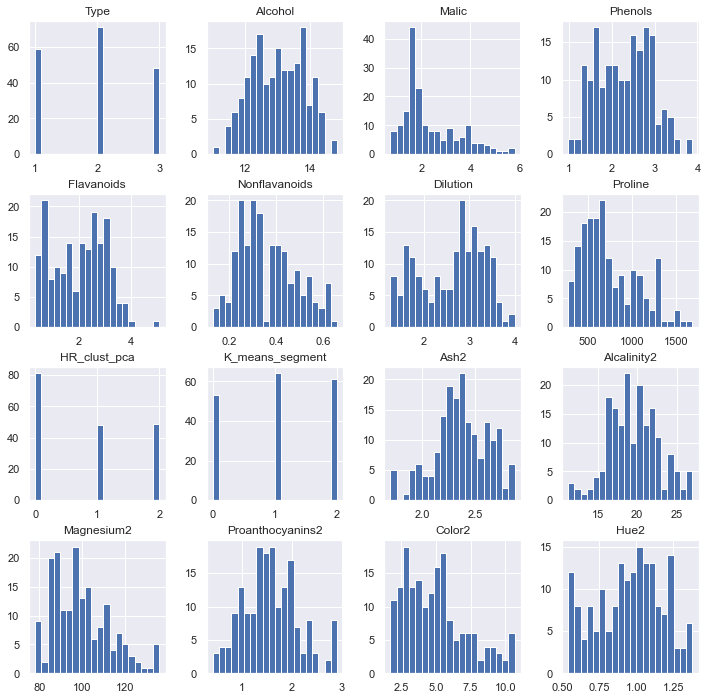

In [378]:
wine_data_copy2.hist(bins=20,figsize=(12,12))
plt.show()

In [353]:
scale=StandardScaler()
scale_dataset= scale.fit_transform(wine_data_copy2)
scale_dataset

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  1.27451089,
         0.26611989,  0.38292961],
       [-1.21394365,  0.24628963, -0.49941338, ..., -0.55094774,
        -0.29362285,  0.42814751],
       [-1.21394365,  0.19687903,  0.02123125, ...,  2.21435097,
         0.2838895 ,  0.3377117 ],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -0.42443081,
         2.2918555 , -1.65187612],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -0.22561848,
         1.89203926, -1.60665822],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -0.42443081,
         1.84761523, -1.56144031]])

In [354]:
normalize_dataset= normalize(scale_dataset)

In [355]:
normalize_dataset= pd.DataFrame(normalize_dataset)
normalize_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.273098,0.341638,-0.126488,0.181998,0.232801,-0.148380,0.415722,0.227894,0.048408,0.268901,0.057696,-0.268955,0.463759,0.286724,0.059868,0.086147
1,-0.296292,0.060113,-0.121894,0.138792,0.179060,-0.200316,0.271764,0.235591,0.344658,0.291739,-0.213106,-0.624021,0.008441,-0.134472,-0.071666,0.104500
2,-0.318387,0.051637,0.005568,0.212180,0.318804,-0.130720,0.206827,0.365913,0.056436,0.313494,0.312448,-0.070151,0.028759,0.580770,0.074457,0.088573
3,-0.233926,0.325960,-0.066830,0.480099,0.282598,-0.189206,0.228169,0.449870,0.041464,0.230331,0.101962,-0.158843,0.194718,0.207286,0.236187,-0.083052
4,-0.367767,0.089583,0.068980,0.245087,0.200964,0.068708,0.136208,-0.011474,0.065188,0.362115,0.596913,0.143896,0.419839,0.128767,-0.097029,0.116009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.274894,0.175332,0.595171,-0.197210,-0.285106,0.254975,-0.246350,-0.004392,-0.196436,-0.261673,0.066903,0.064089,-0.068183,-0.189798,0.236355,-0.285283
174,0.349399,0.125466,0.359253,-0.201759,-0.326632,0.139648,-0.377776,0.002516,-0.249676,-0.332594,0.114754,0.278145,0.046978,-0.080361,0.255223,-0.293605
175,0.279854,0.067782,0.355402,-0.230144,-0.273890,0.111853,-0.302583,0.057153,-0.199981,-0.266394,-0.082642,0.033738,0.312874,-0.086456,0.466848,-0.336485
176,0.306856,0.046732,0.050856,-0.230876,-0.302558,0.302618,-0.312850,0.066224,-0.219276,-0.292097,0.005083,0.036993,0.343062,-0.050392,0.422592,-0.358851


In [356]:
pca= PCA()
pca.fit(normalize_dataset)

PCA()

In [357]:
var= pca.explained_variance_ratio_
var

array([0.41243386, 0.17654735, 0.09696172, 0.06262866, 0.04812047,
       0.0426067 , 0.03344168, 0.02639617, 0.02238036, 0.02097465,
       0.01639804, 0.01481154, 0.01048627, 0.0099662 , 0.00420628,
       0.00164006])

In [358]:
var1= np.cumsum(np.round(var,decimals=4)*100)
var1

array([41.24, 58.89, 68.59, 74.85, 79.66, 83.92, 87.26, 89.9 , 92.14,
       94.24, 95.88, 97.36, 98.41, 99.41, 99.83, 99.99])

Text(0, 0.5, 'Cumulative Explained Variance')

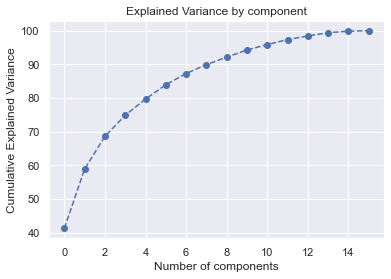

In [359]:
plt.plot(var1,marker='o',linestyle='--')
plt.title('Explained Variance by component')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

In [360]:
pca=PCA(n_components=3)
X_principal1= pca.fit_transform(normalize_dataset)
X_principal1=pd.DataFrame(X_principal1)
X_principal1.columns=['P1','P2','P3']
X_principal1.head()

,P1,P2,P3
0,-0.807220,-0.377499,0.027547
1,-0.747102,0.086082,-0.463965
2,-0.762630,-0.296440,0.312576
3,-0.764133,-0.553697,0.000228
4,-0.508305,-0.346714,0.638800


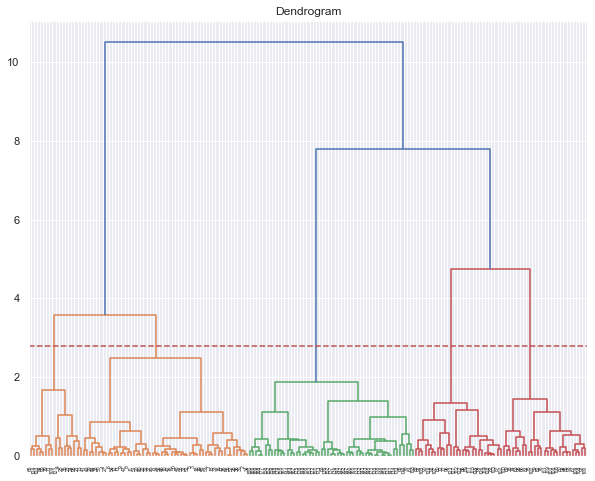

In [361]:
plt.figure(figsize=(10,8))
plt.title('Dendrogram')
dendrogram= sch.dendrogram(sch.linkage(X_principal1,method='ward',metric='euclidean'))
plt.axhline(y=2.8, color='r', linestyle='--')

Below is the normal Dedrogram with outliers.
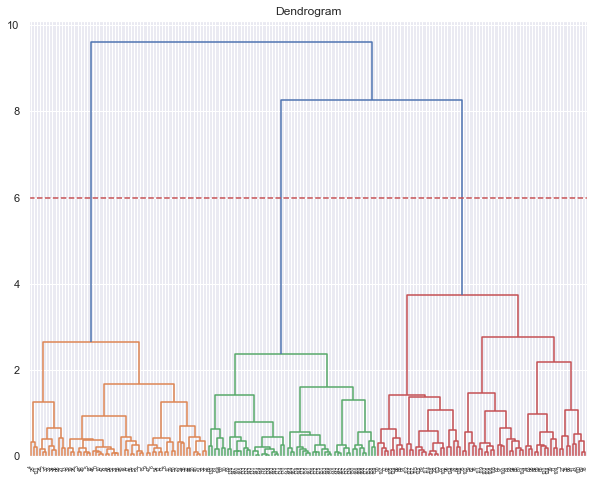


In [362]:
#when k=3
#We have three cluster now we will use Agglomerative Clustering
# Ward method is commanly used since it is simpler to visualize understanding.
h_complete1 = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(X_principal1)
cluster_labels1=pd.Series(h_complete1.labels_)
cluster_labels1
wine_data['HR_clust_pca2']=cluster_labels1 # creating a new column and assigning it to new column
wine_data.iloc[:,1:14].groupby(wine_data.HR_clust_pca2).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
HR_clust_pca2,,,,,,,,,,,,,
0,12.788148,2.836667,2.409753,21.443210,96.283951,1.807531,1.194568,0.448148,1.241728,5.589877,0.819580,2.048519,574.358025
1,13.513571,2.036857,2.469143,17.797143,106.185714,2.832857,2.974286,0.294429,1.963714,5.181714,1.064571,3.156000,1033.942857
2,12.308148,1.611852,1.970741,18.051852,93.407407,2.363704,2.083333,0.277778,1.671852,3.142222,1.093333,2.890000,520.296296


In [363]:
wine_data.iloc[:,1:14].groupby(wine_data.HR_clust_pca).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
HR_clust_pca,,,,,,,,,,,,,
0,12.788148,2.836667,2.409753,21.443210,96.283951,1.807531,1.194568,0.448148,1.241728,5.589877,0.819580,2.048519,574.358025
1,13.424583,2.106250,2.559583,18.708333,108.916667,2.904792,3.029792,0.302292,1.996042,5.212917,1.067708,3.154375,1022.729167
2,12.936531,1.734694,2.105918,17.044898,96.469388,2.503878,2.428980,0.277551,1.771224,4.027347,1.077347,3.011020,761.897959


## K-means clustering

In [364]:
#WE fit K means using the transformed data
wcss=[]
for i in range(1,21):
    kmeans_data2=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans_data2.fit(X_principal1)
    wcss.append(kmeans_data2.inertia_)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


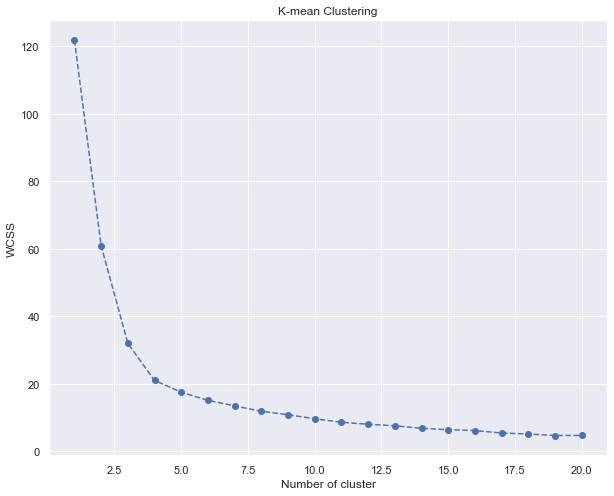

In [365]:
#The next step involves plotting the WCSS against the number of components on a graph.
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('K-mean Clustering')
plt.show()

In [366]:
#All left to do is to implement it.
#We have chosen three clusters, so we run K-means with number of clusters equals four.
#Same initilizer and random state as before.
kmeans_data2=KMeans(n_clusters=3,init='k-means++',max_iter=300, n_init=10, random_state=0)

In [367]:
#We fit our data with K-means model
kmeans_data2.fit(X_principal1)

KMeans(n_clusters=3, random_state=0)

## Analyze the Results of K-Means Clustering

In [368]:
#The last column we add K-means clustering labels.
wine_data['K_means_segment2']=kmeans_data2.labels_
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,HR_clust_pca,K_means_segment,HR_clust_pca2,K_means_segment2
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2,1,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2,1,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2,1,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2,1,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2,1,1


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


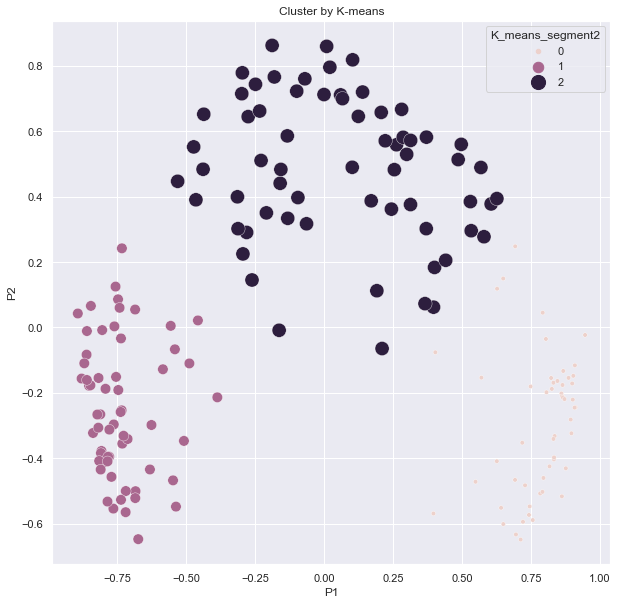

In [369]:
#let’s visualize the K-means clustering
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
sns.scatterplot(X_principal1['P1'], X_principal1['P2'],hue=wine_data['K_means_segment2'],
cmap=matplotlib.colors.ListedColormap(colors),s=15,size=wine_data.K_means_segment2,
sizes=(20, 200), legend="full")
plt.title('Cluster by K-means')
plt.show()

In [370]:
#As we passed n_cluster to be 4 we get 4 centres of the clusters
kmeans_data2.cluster_centers_

array([[ 0.77911444, -0.29502528, -0.10901154],
       [-0.73606261, -0.24987579,  0.00773806],
       [ 0.05635553,  0.48248067,  0.08289984]])

In [371]:
wine_data.iloc[:,1:14].groupby(wine_data.K_means_segment2).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
K_means_segment2,,,,,,,,,,,,,
0,13.122075,3.230566,2.412642,21.145283,98.962264,1.688868,0.831698,0.452264,1.138113,7.079057,0.702189,1.703396,626.264151
1,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344
2,12.222500,1.919219,2.245156,20.237500,92.718750,2.275781,2.125156,0.356250,1.649375,3.016094,1.063750,2.846250,500.093750


In [372]:
wine_data.iloc[:,1:14].groupby(wine_data.K_means_segment).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
K_means_segment,,,,,,,,,,,,,
0,13.122075,3.230566,2.412642,21.145283,98.962264,1.688868,0.831698,0.452264,1.138113,7.079057,0.702189,1.703396,626.264151
1,12.222500,1.919219,2.245156,20.237500,92.718750,2.275781,2.125156,0.356250,1.649375,3.016094,1.063750,2.846250,500.093750
2,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344


In [374]:
wine_data.tail(50)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,HR_clust_pca,K_means_segment,HR_clust_pca2,K_means_segment2
128,2,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.120000,0.89,2.78,342,0,1,0,2
129,2,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.600000,0.79,2.57,580,0,1,0,2
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,0,0,0,0
131,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530,0,0,0,0
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,0,0,0,0
133,3,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600,0,0,0,0
134,3,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650,0,0,0,0
135,3,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695,0,0,0,0
136,3,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720,0,0,0,0
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.000000,0.82,1.69,515,0,0,0,0


In [385]:
pd.set_option('display.max_rows', wine_data.shape[0]+1)
wine_data[['Type','HR_clust_pca','K_means_segment','HR_clust_pca2','K_means_segment2']]

,Type,HR_clust_pca,K_means_segment,HR_clust_pca2,K_means_segment2
0,1,1,2,1,1
1,1,2,2,1,1
2,1,1,2,1,1
3,1,1,2,1,1
4,1,1,2,1,1
5,1,1,2,1,1
6,1,2,2,1,1
7,1,1,2,1,1
8,1,2,2,1,1
9,1,2,2,1,1


Well, after working alot on the dataset, according to our output, we saw that the Hierarchical Clustering (HR_clust_pca	) with outliers and Hierarchical Clustering (HR_clust_pca2) without outliers have shown very distinct output, while comparing the two output with the original Type values given to us the Hierarchical Clustering (HR_clust_pca2) have shown maximum correct prediction on clustering, same the result is for K-means Clustering (K_means_segment) & K-means Clustering (K_means_segment2) comparing the two output with the original Type values given to us the K-means Clustering (K_means_segment2) have shown maximum correct prediction, although the dataset consists very less data we cannot whole depend on it for more better result we should work on large dataset for much better result. 